# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1076]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd

#visualisation 
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [1078]:
# Importing the file porter_data_1.csv
df= pd.read_csv(r"C:\Users\Jothi.Vijayakumar\OneDrive - Sapiens\Desktop\IITB-AI & ML\Linear regression\Linear regression assignment\Delivery_Starter\porter_data_1.csv")

In [1079]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [1083]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] =  pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [1085]:
# Convert categorical features to category type

categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']

# Convert them to 'category' type
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [1086]:
df.isnull().mean()

market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_dashers       0.0
total_busy_dashers          0.0
total_outstanding_orders    0.0
distance                    0.0
dtype: float64

In [1087]:
df[categorical_columns].nunique()

market_id                  6
store_primary_category    73
order_protocol             7
dtype: int64

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [1090]:
# Calculate time taken in minutes
df['delivery_duration'] =  (df['created_at'] -  df['actual_delivery_time']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [1092]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] =  df['created_at'].dt.hour
df['day_of_week'] =  df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'

df['isWeekend'] =  df['day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

In [1093]:
# Drop unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [1096]:
# Define target variable (y) and features (X)
y = df['delivery_duration']
X = df.drop(columns=['actual_delivery_time', 'created_at', 'delivery_duration'])


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [1098]:
# Split data into training and testing sets
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test =  train_test_split(X,y,test_size=0.2, random_state=100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [1101]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns


In [1102]:
print(num_cols)

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration', 'hour',
       'day_of_week', 'isWeekend'],
      dtype='object')


In [1103]:
print(cat_cols)

Index(['market_id', 'store_primary_category', 'order_protocol'], dtype='object')


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

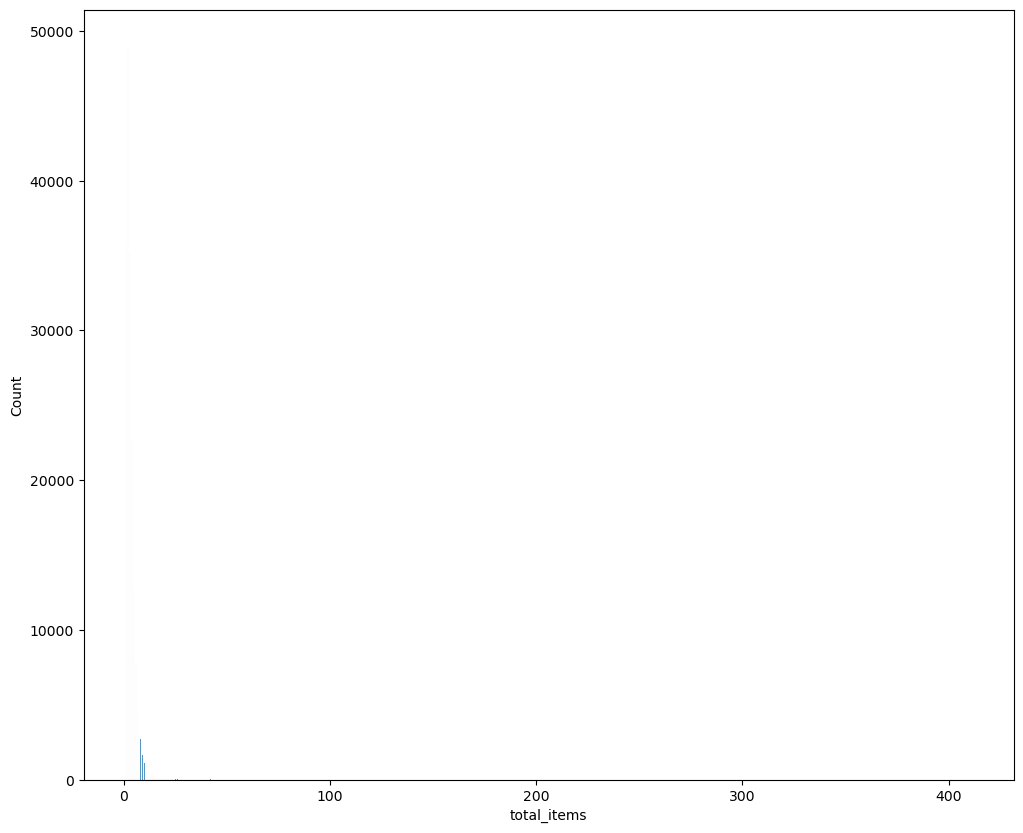

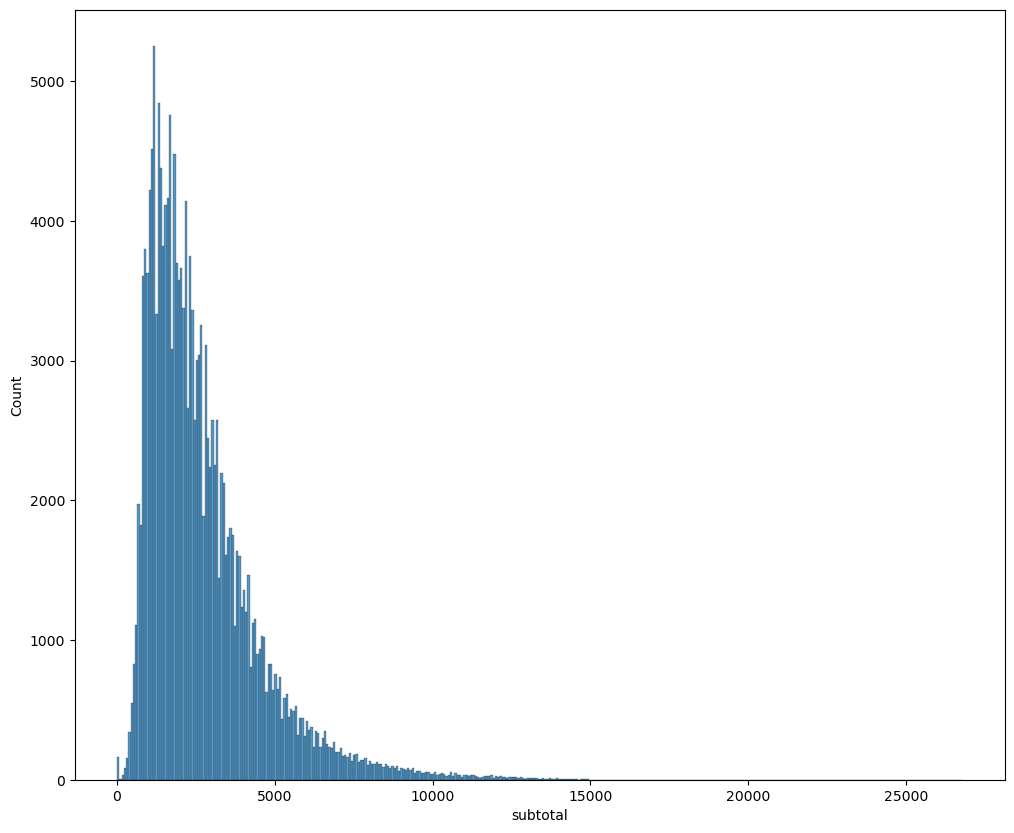

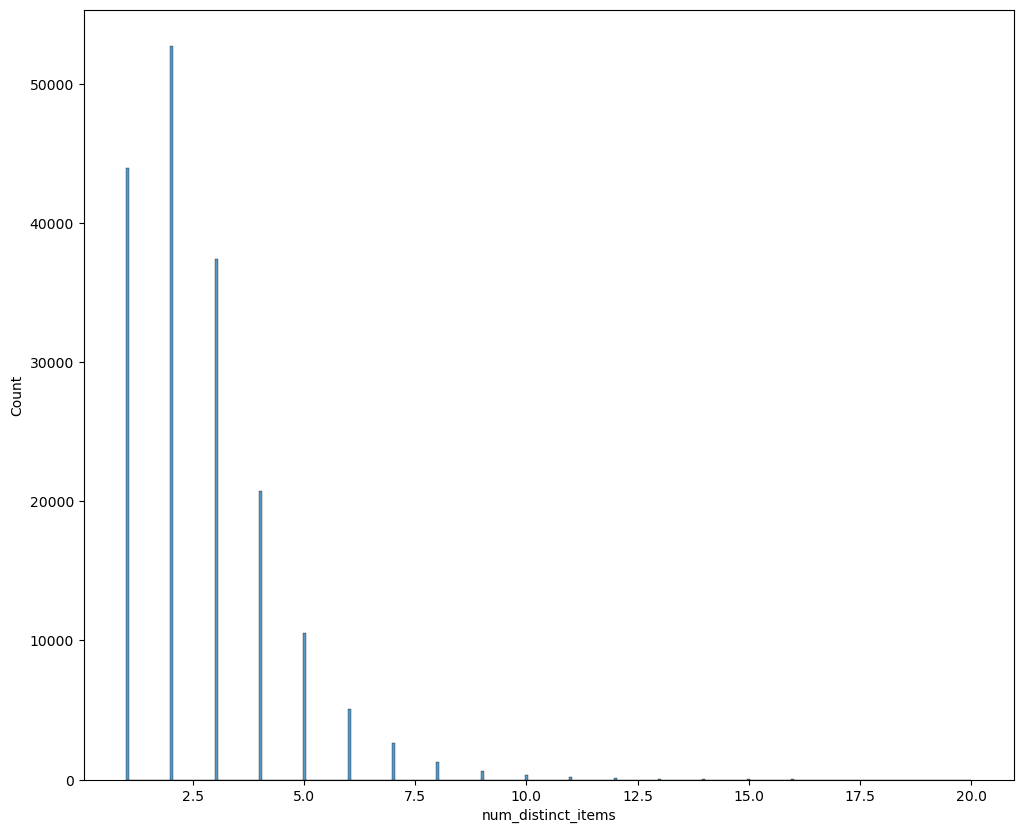

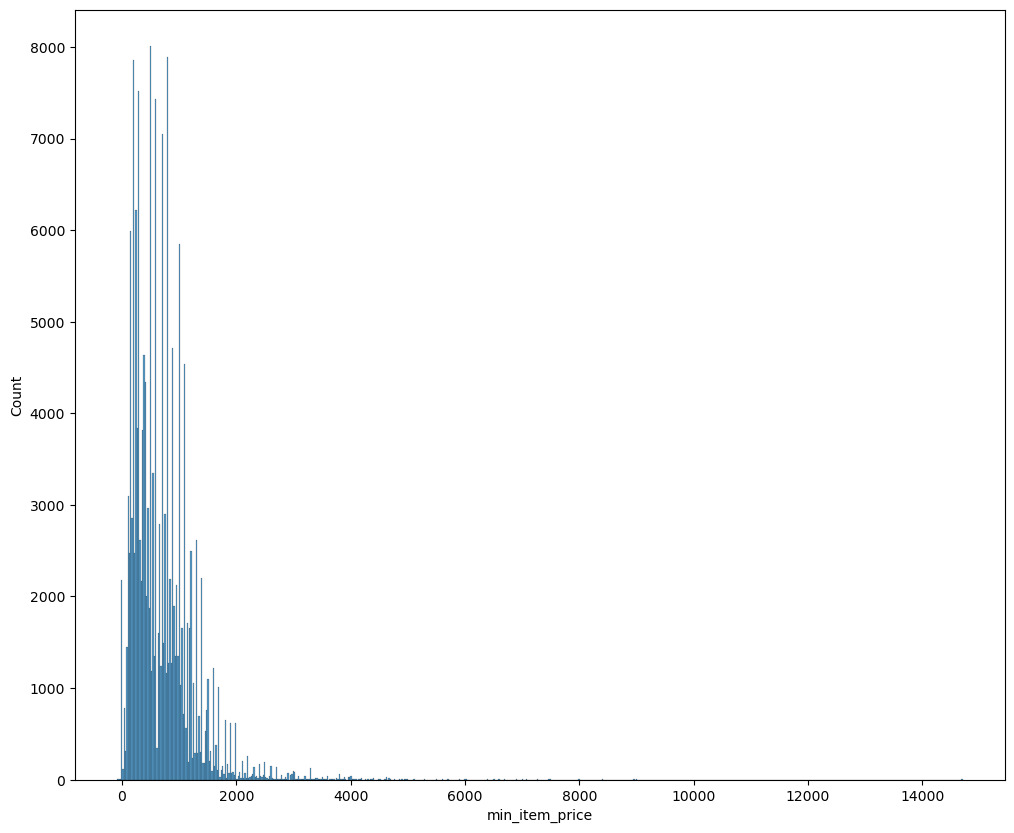

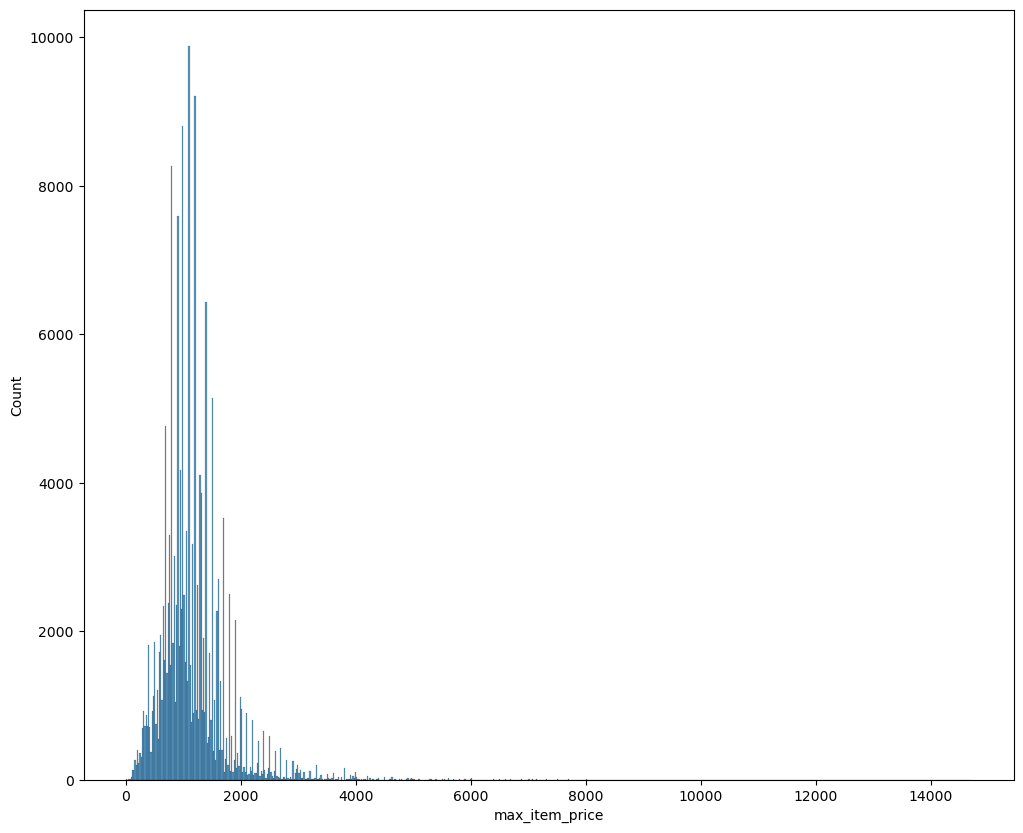

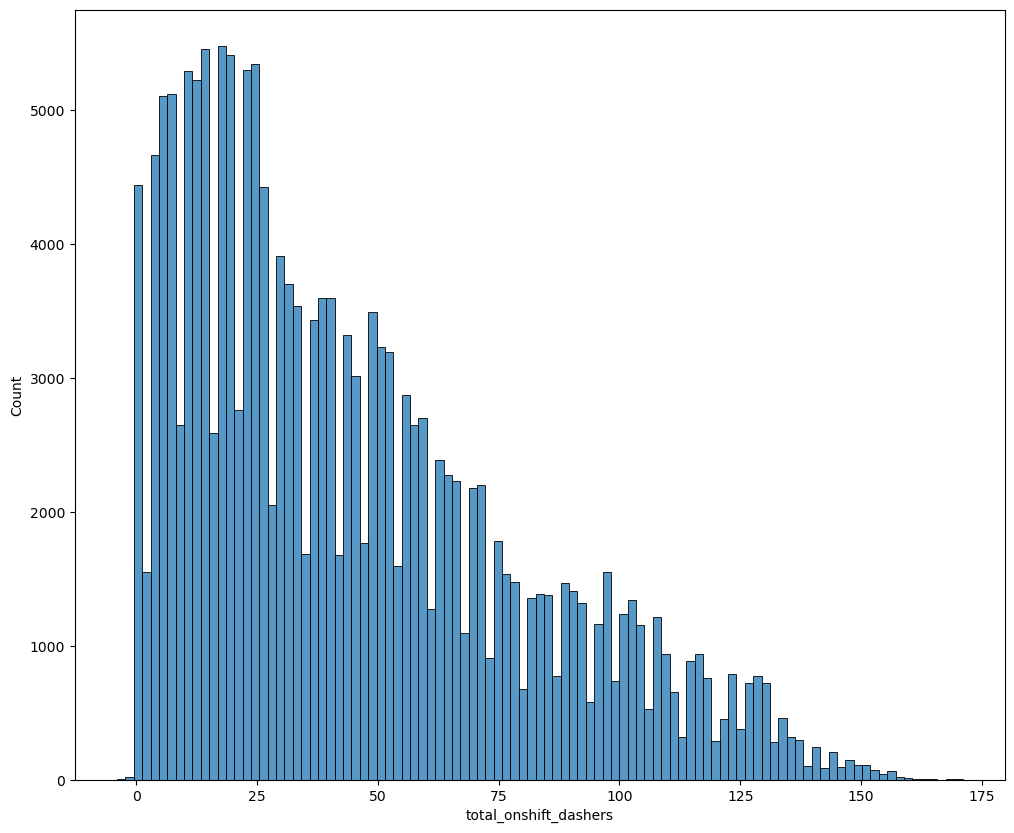

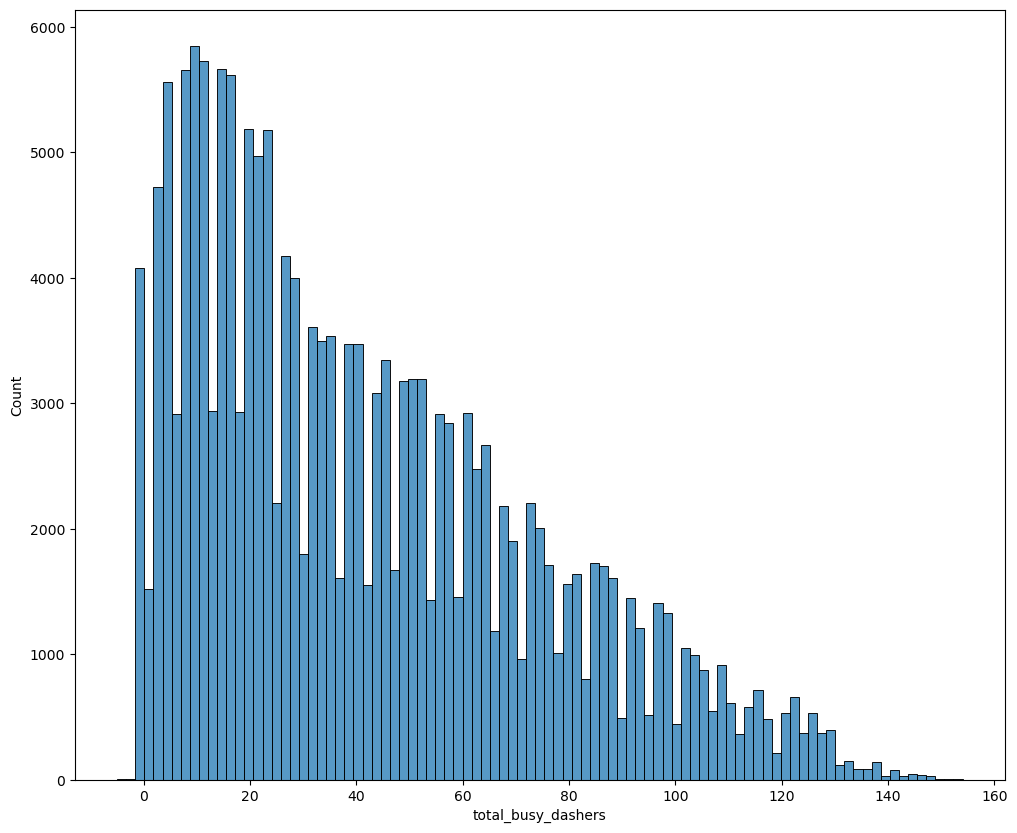

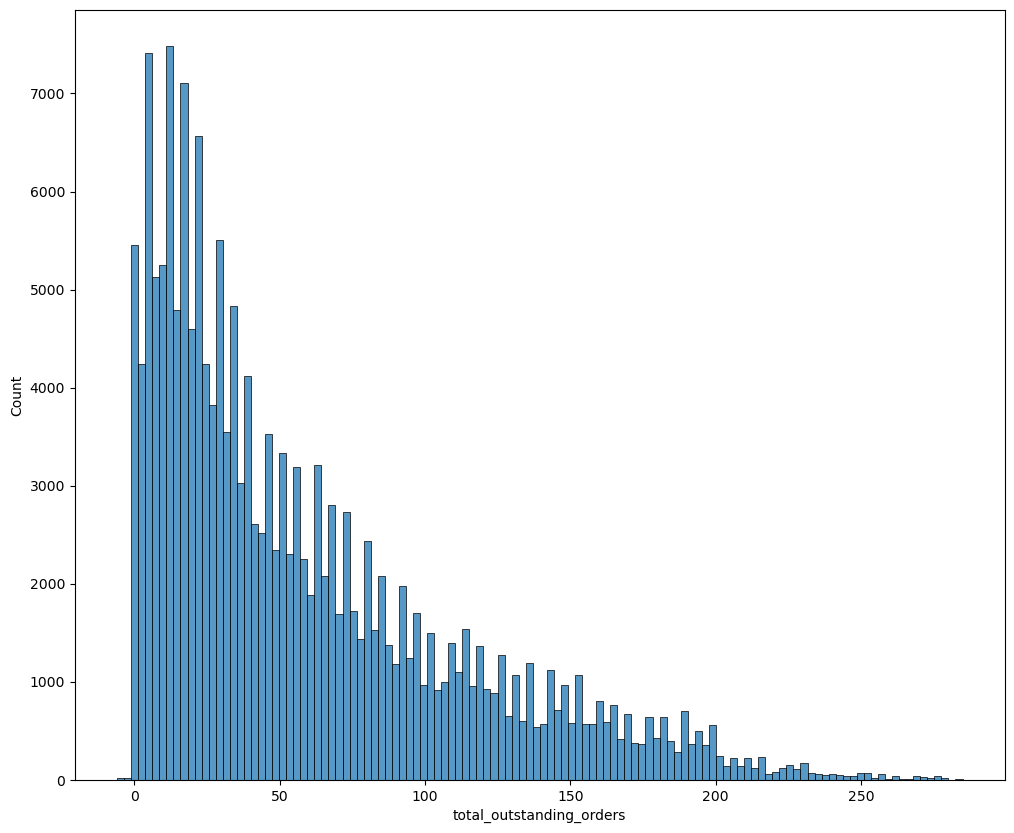

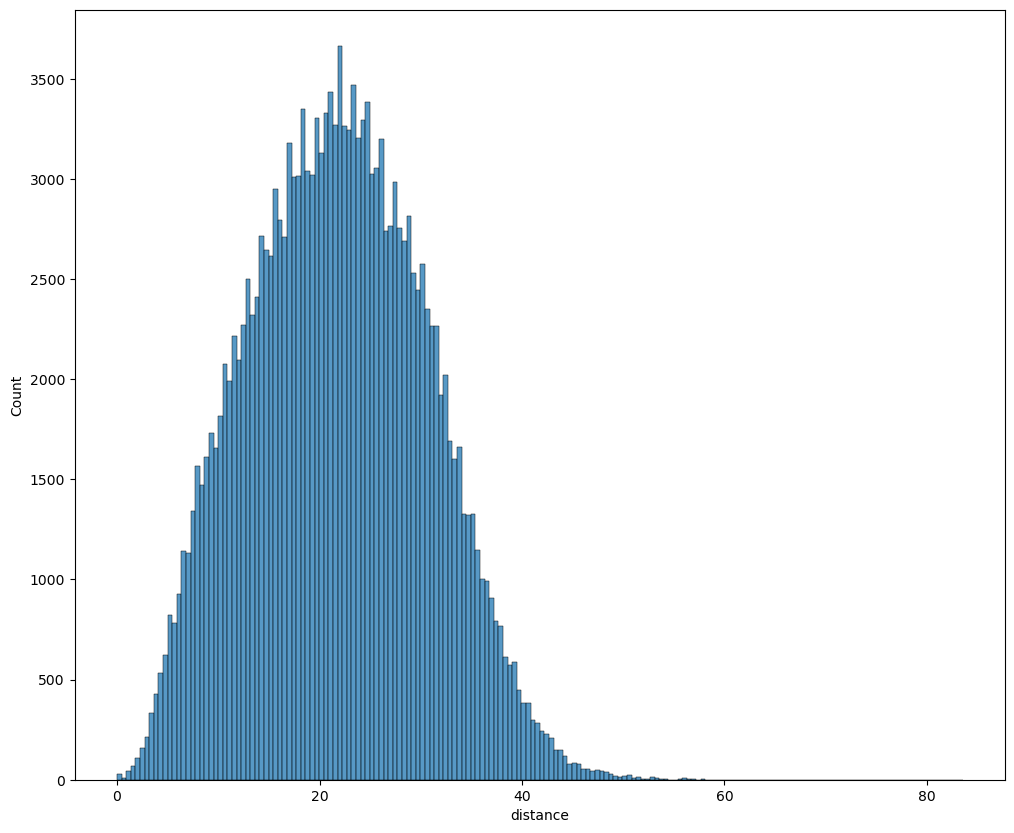

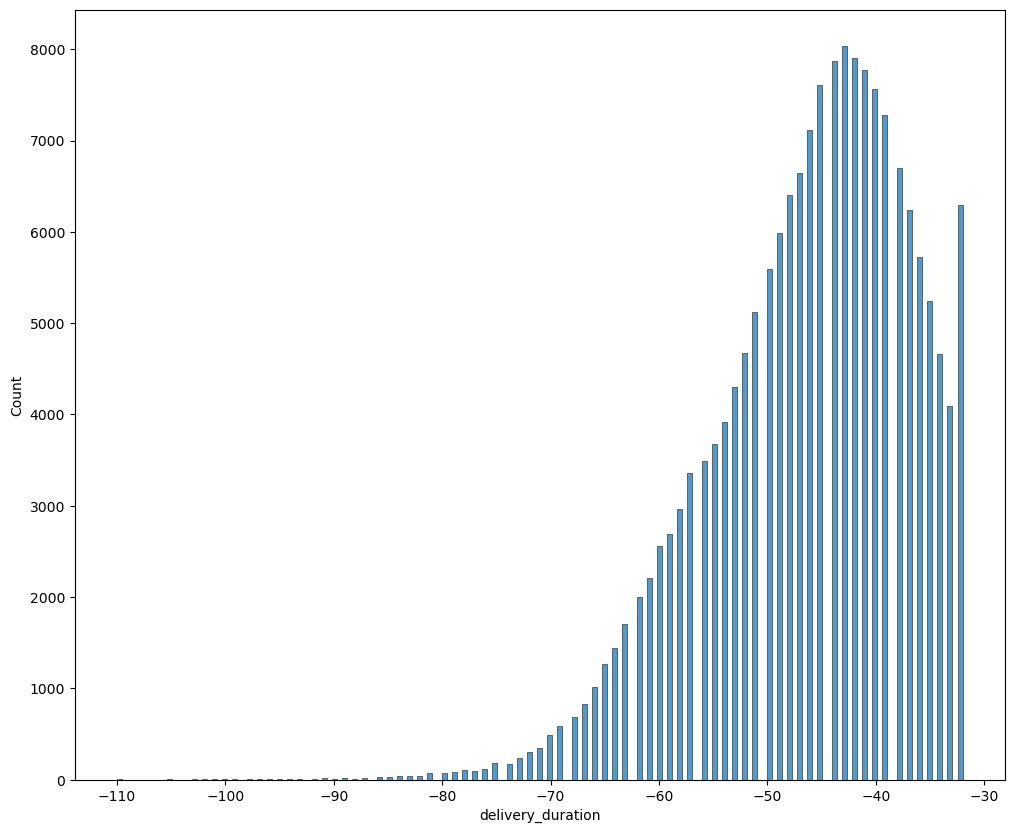

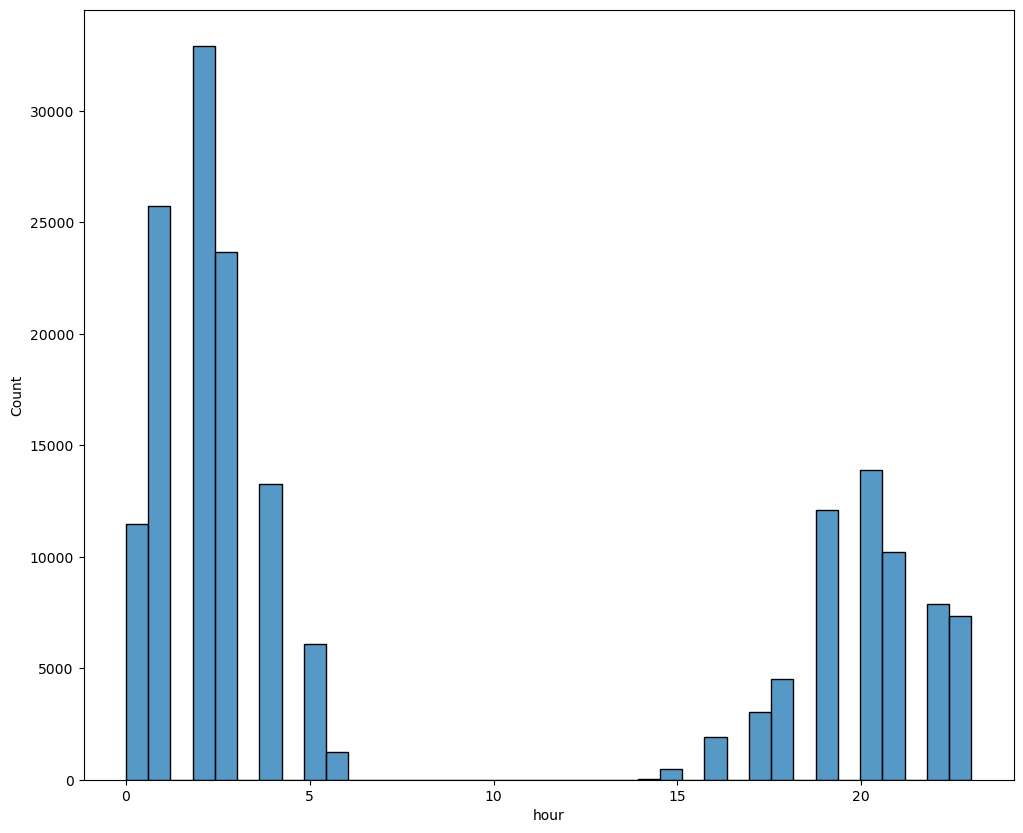

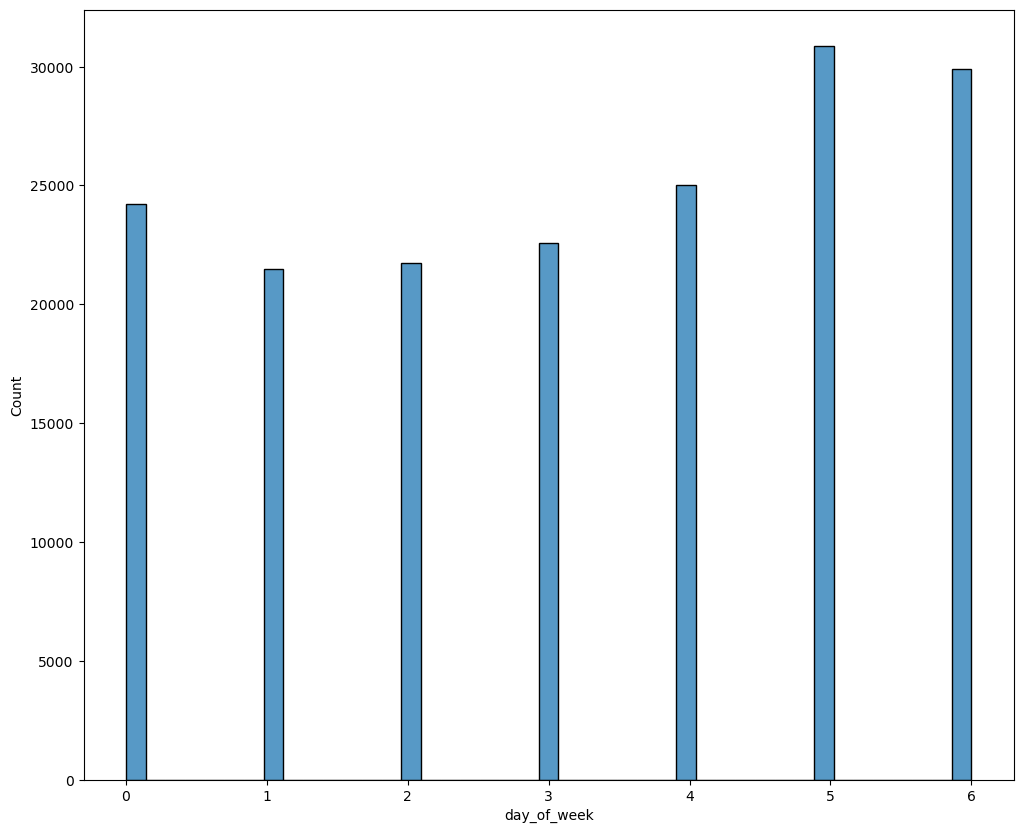

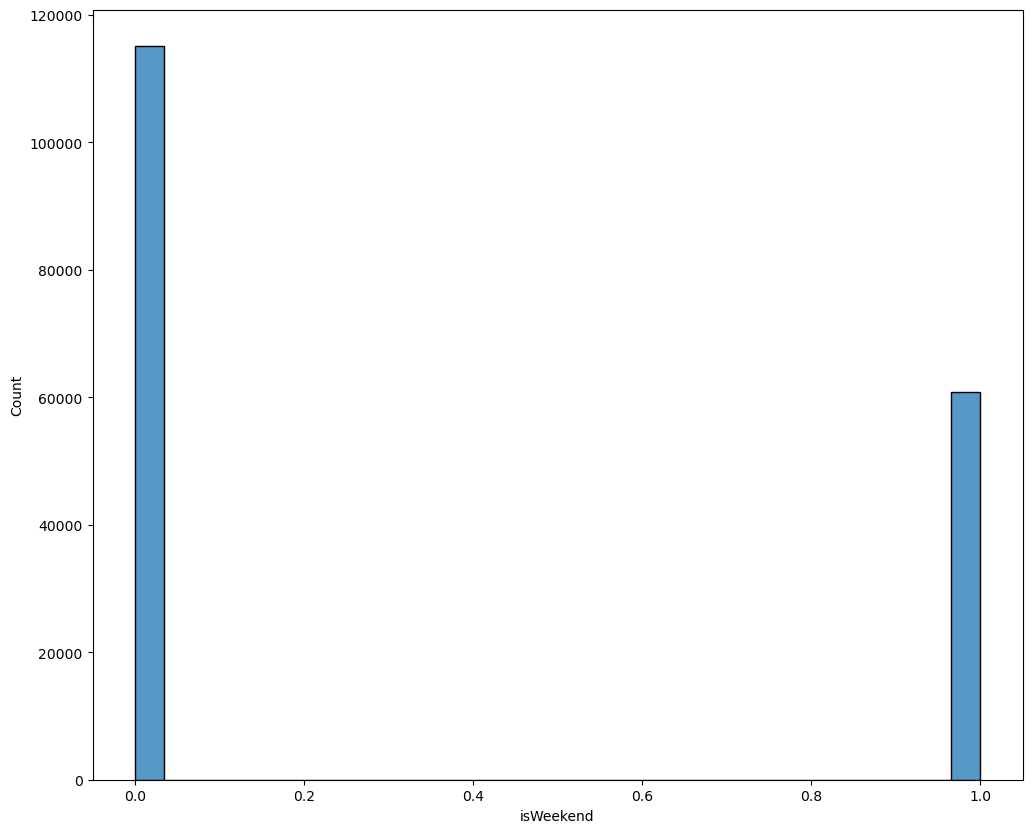

In [1105]:
# Plot distributions for all numerical columns

#univarient_columns for numeric columns
for i in num_cols:
    plt.figure(figsize= (12,10))
    sns.histplot(df[i])
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

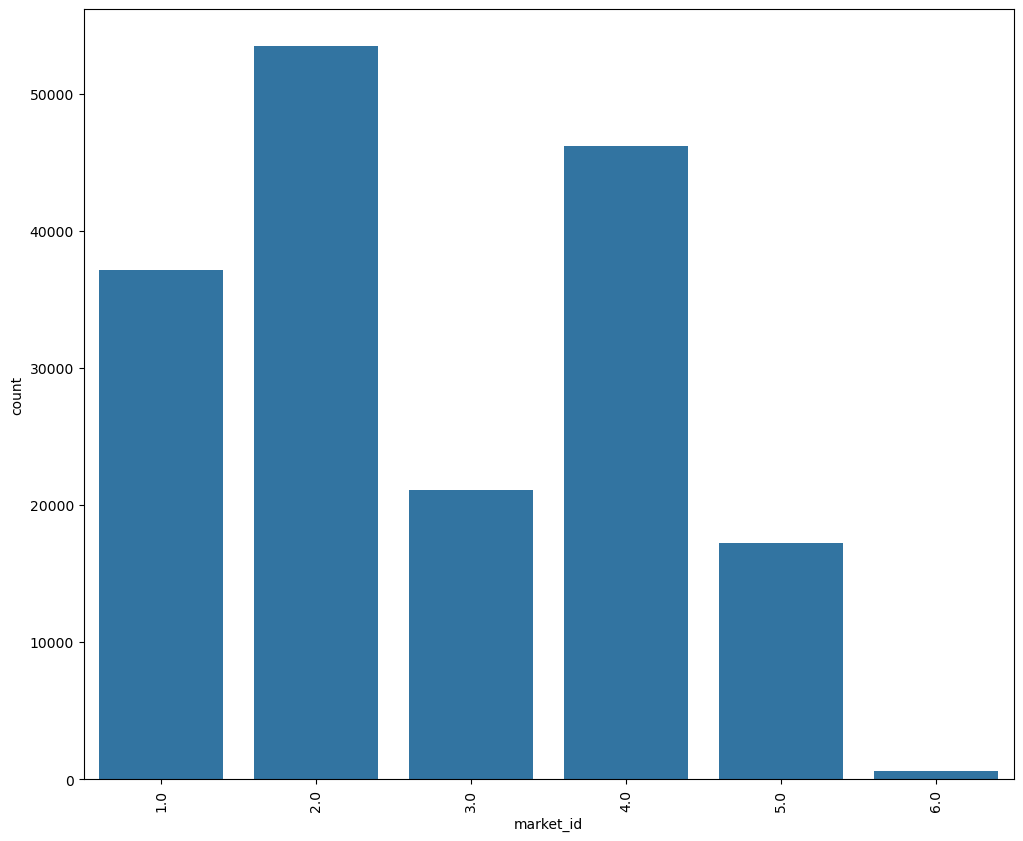

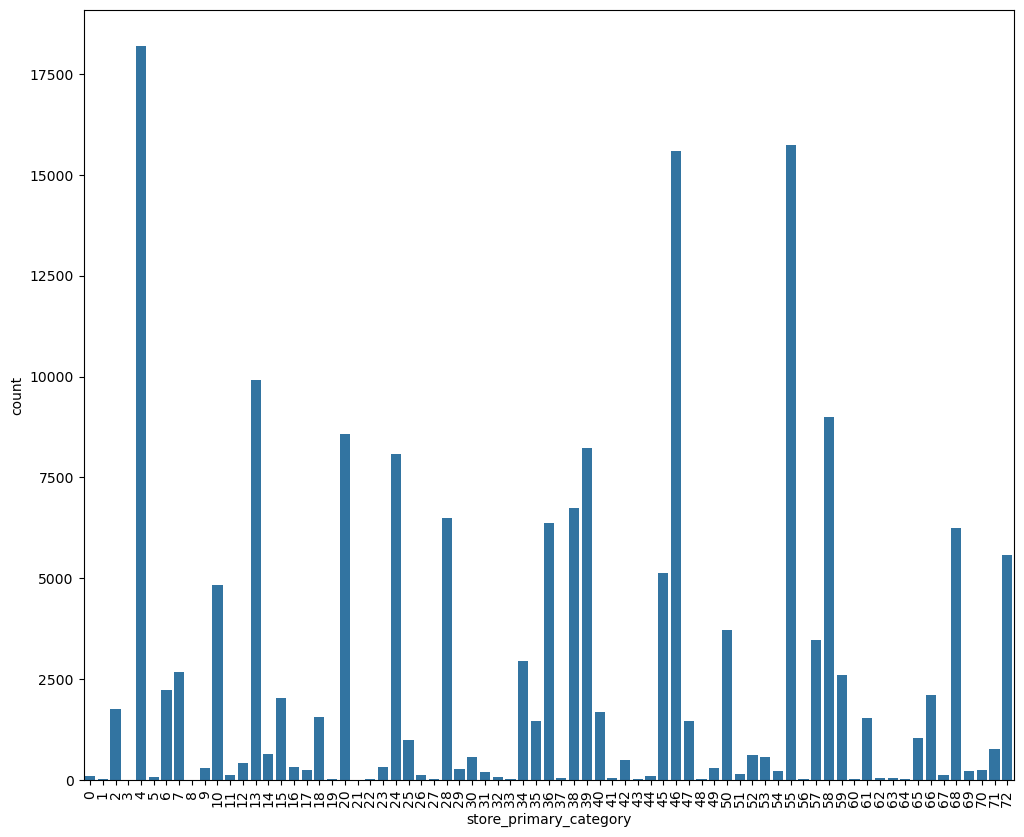

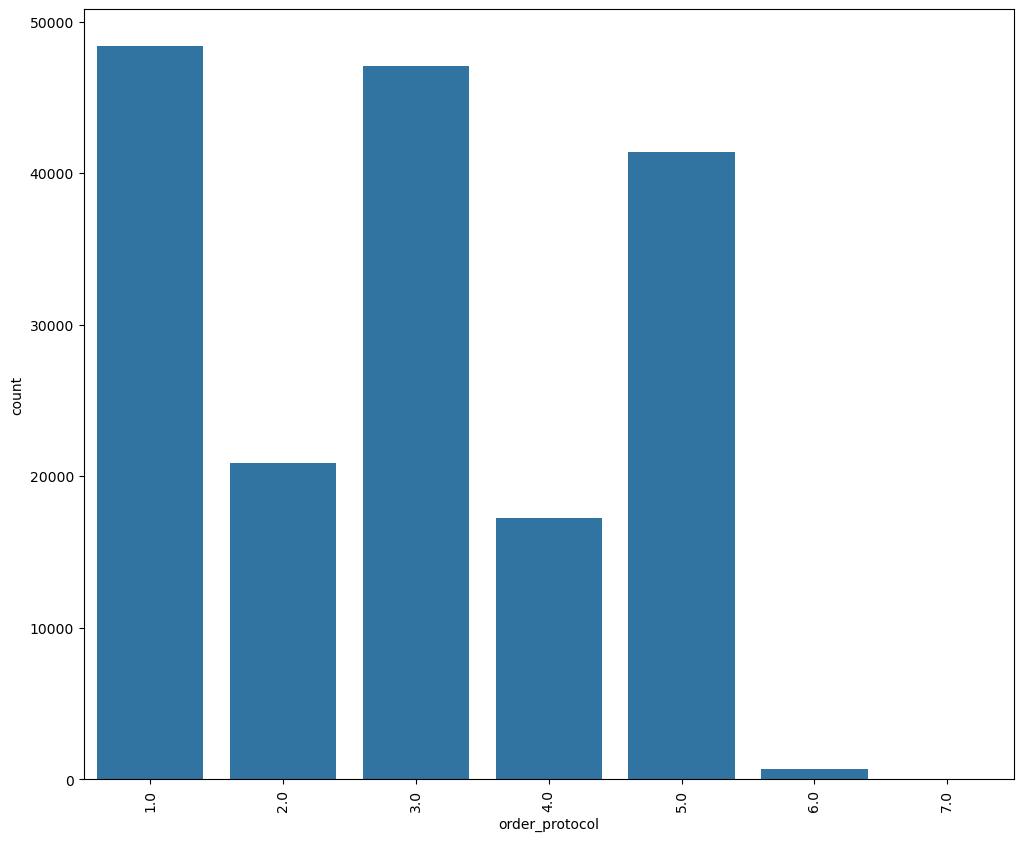

In [1107]:
# Distribution of categorical columns
for i in cat_cols:
    plt.figure(figsize= (12,10))
    sns.countplot(x= df[i])
    plt.xticks(rotation= 90)
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

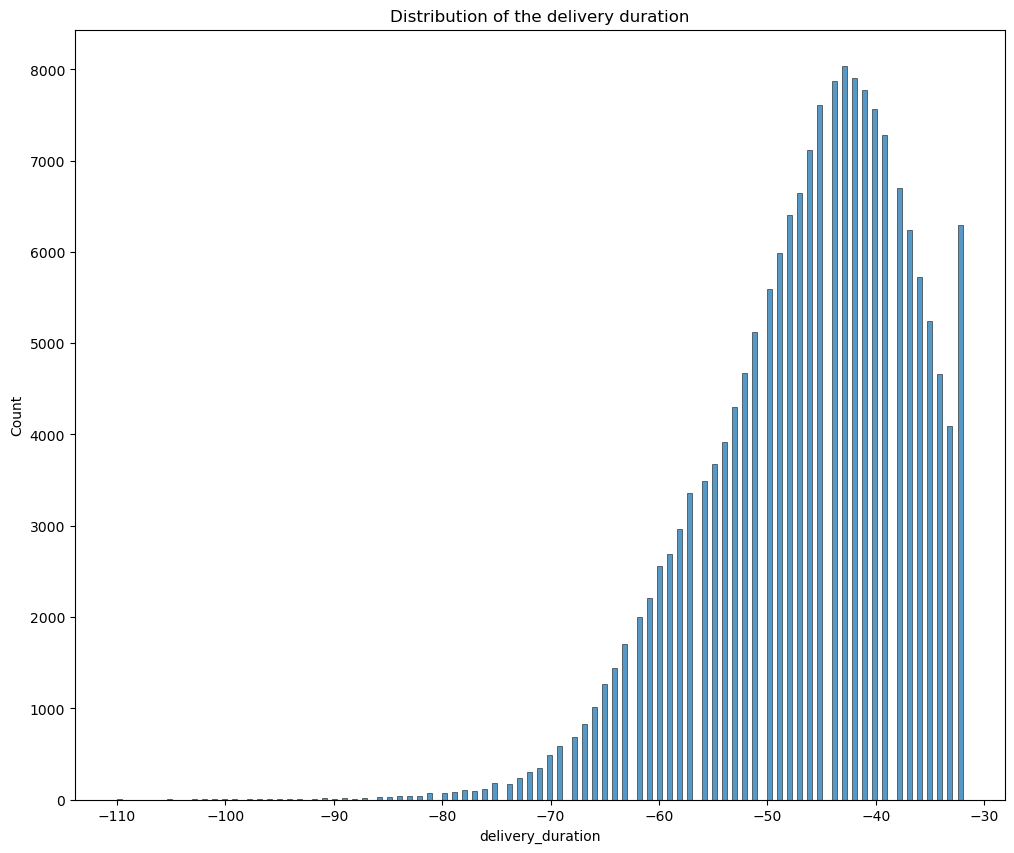

In [1109]:
# Distribution of time_taken

plt.figure(figsize=(12,10))
plt.title("Distribution of the delivery duration")
sns.histplot(df['delivery_duration'])
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

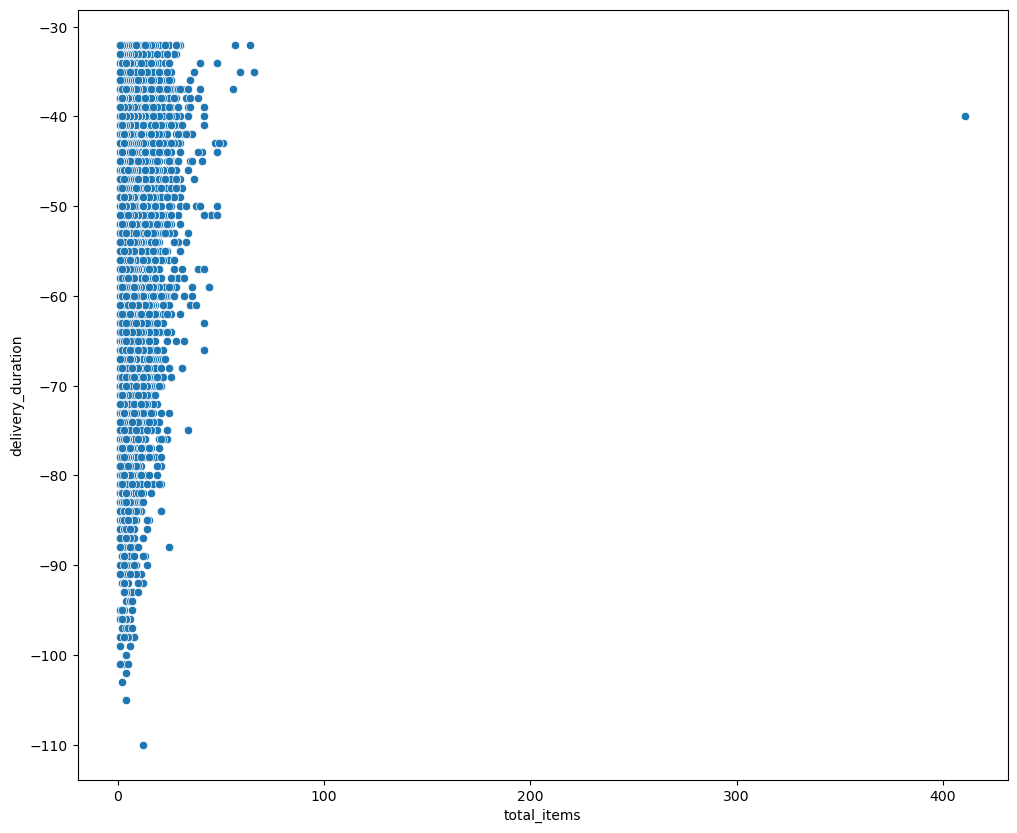

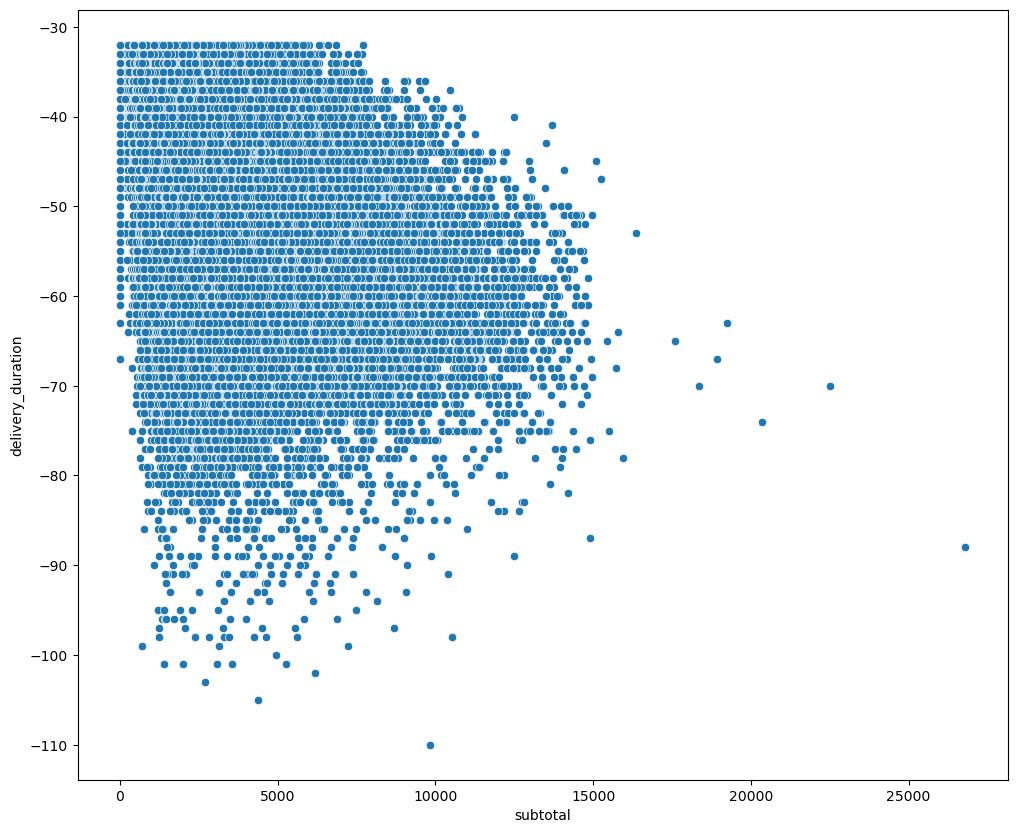

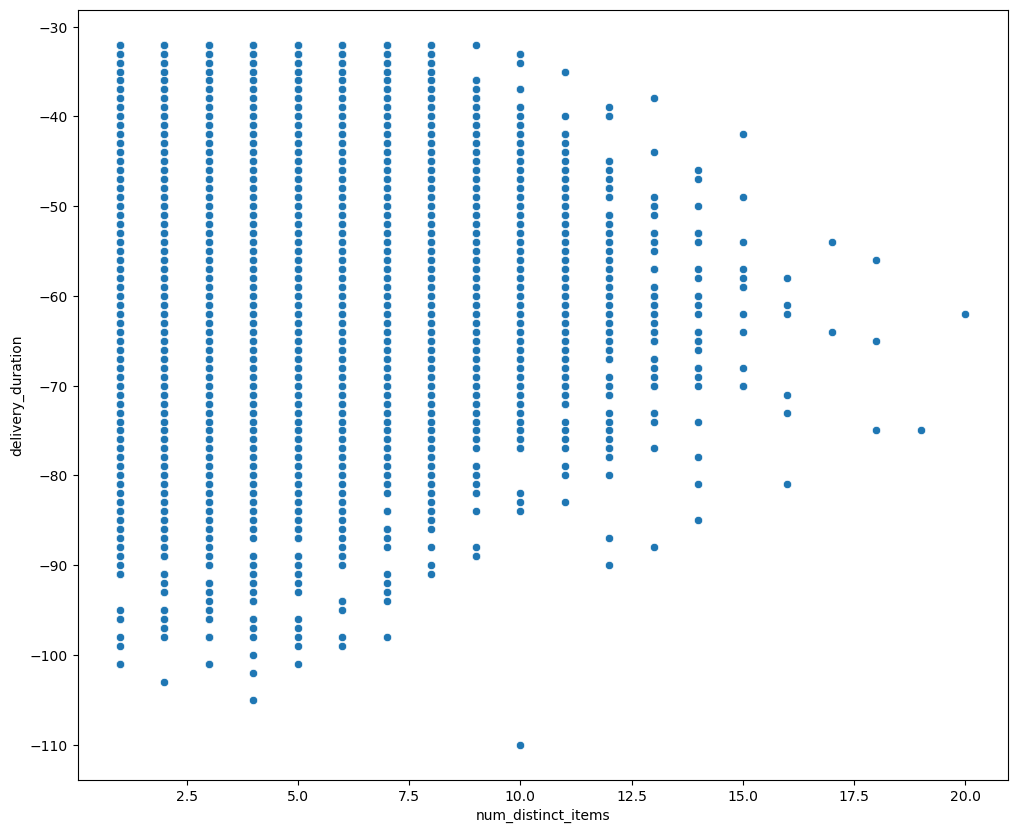

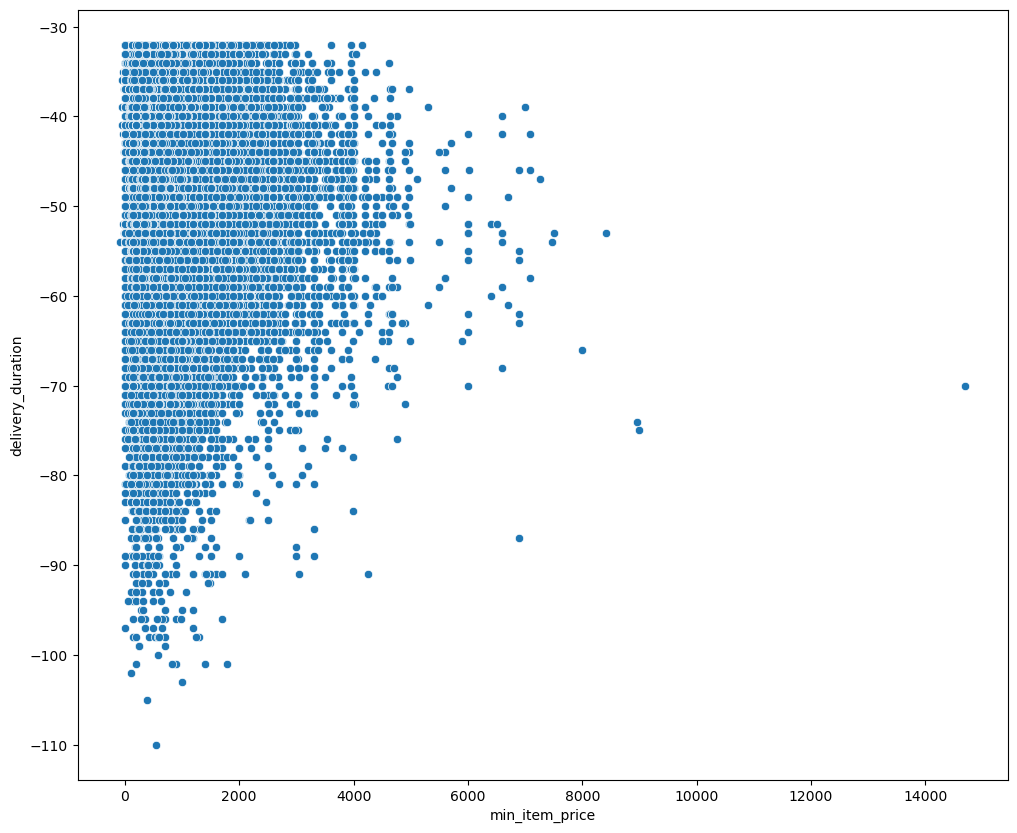

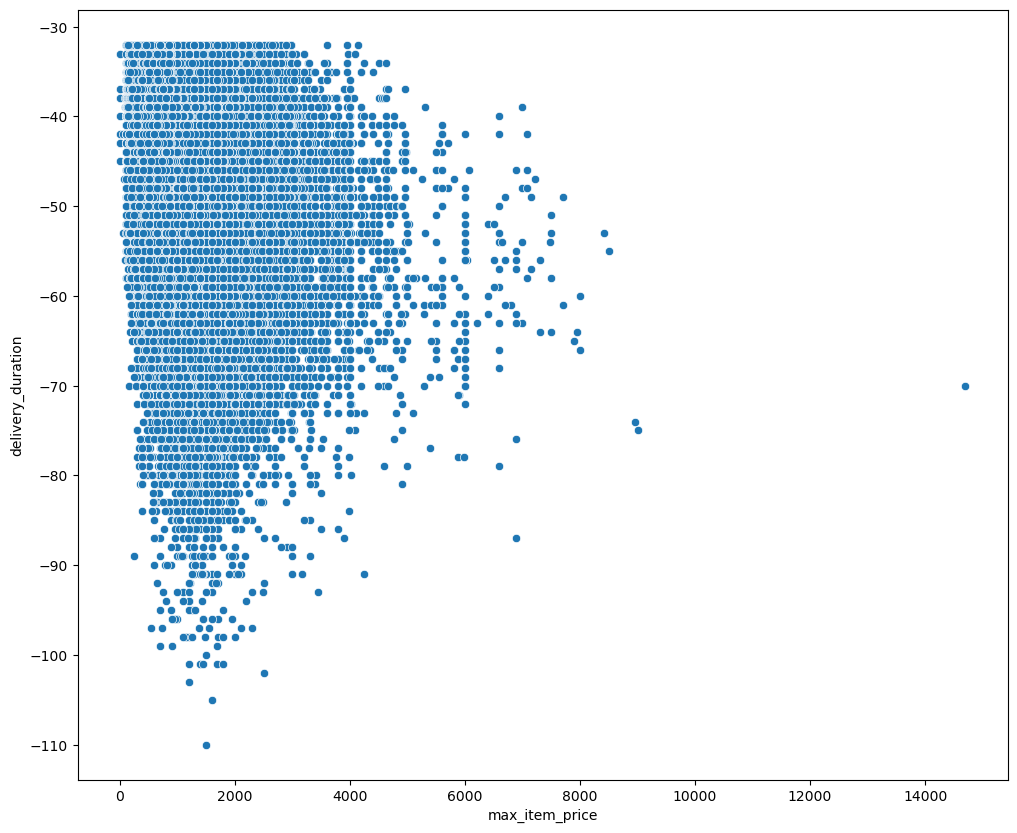

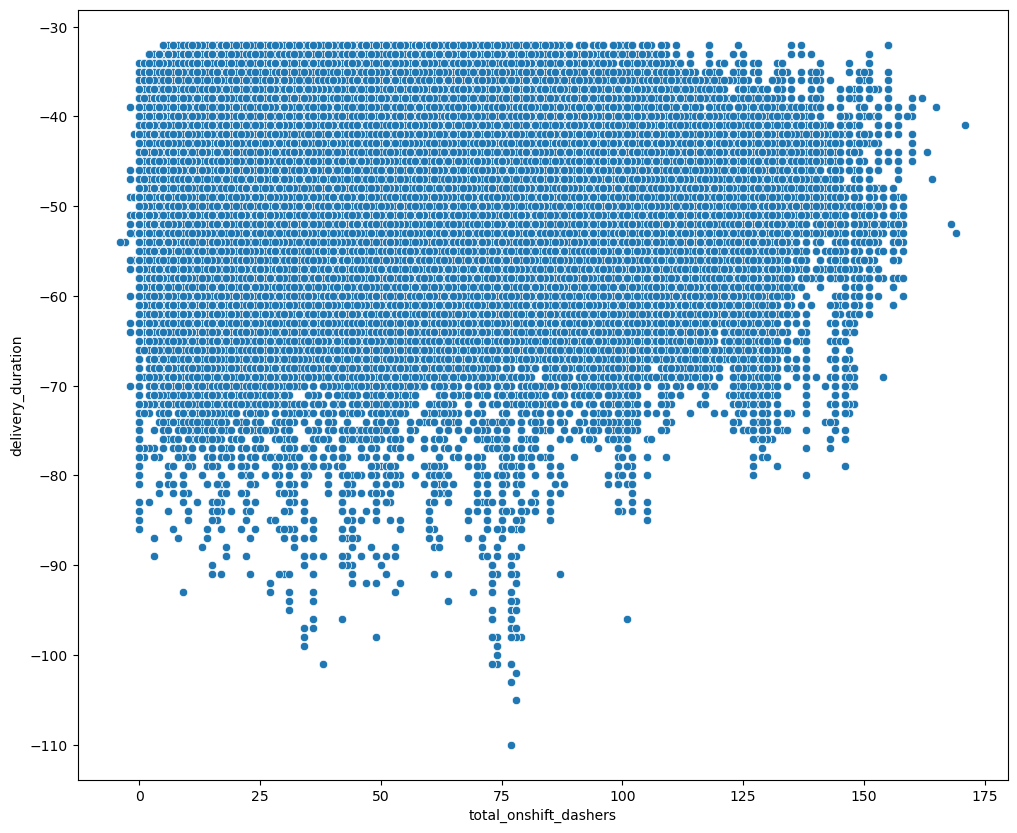

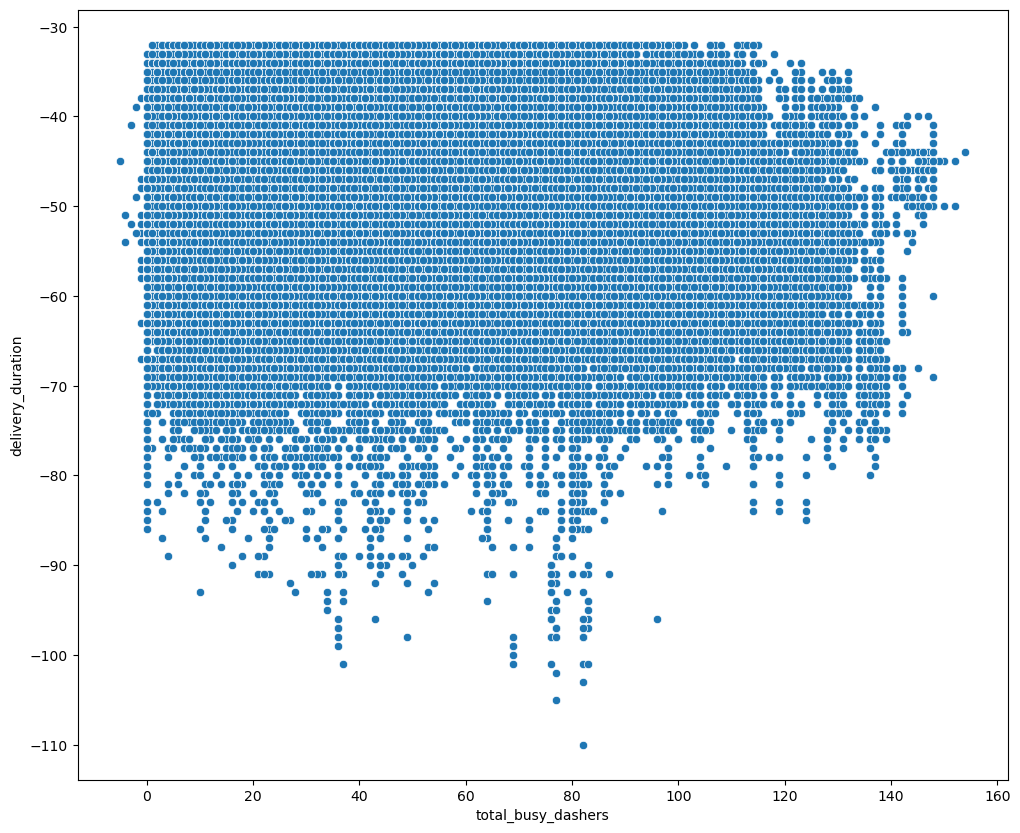

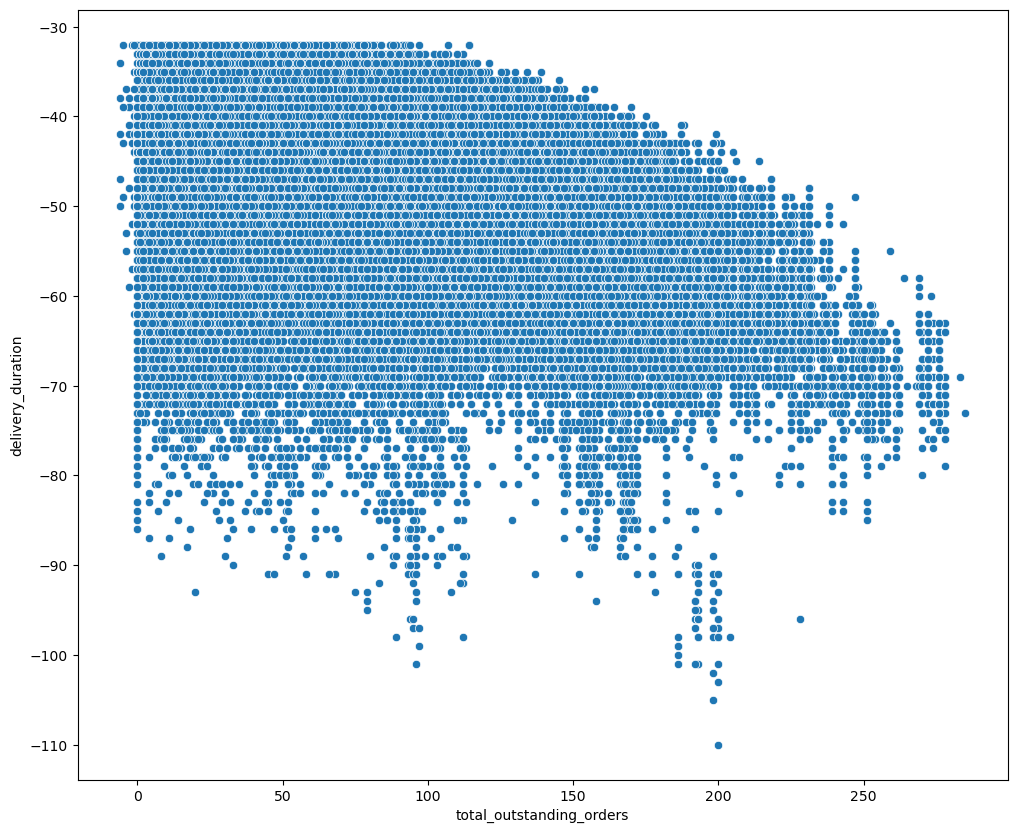

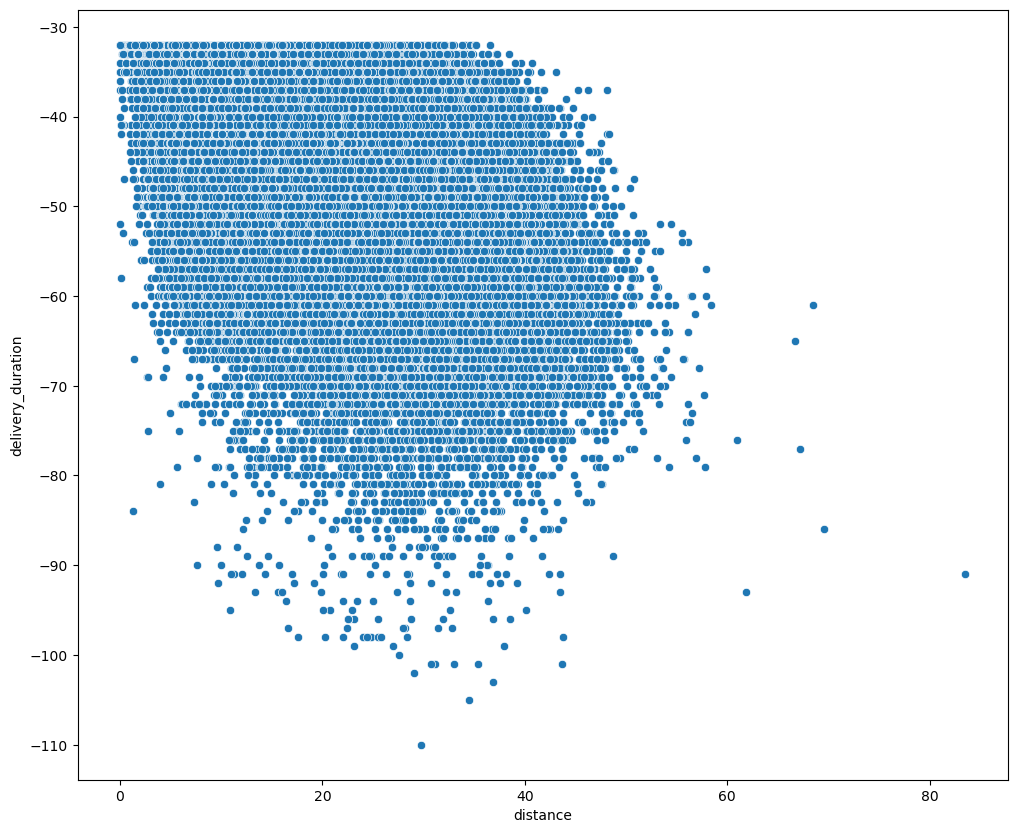

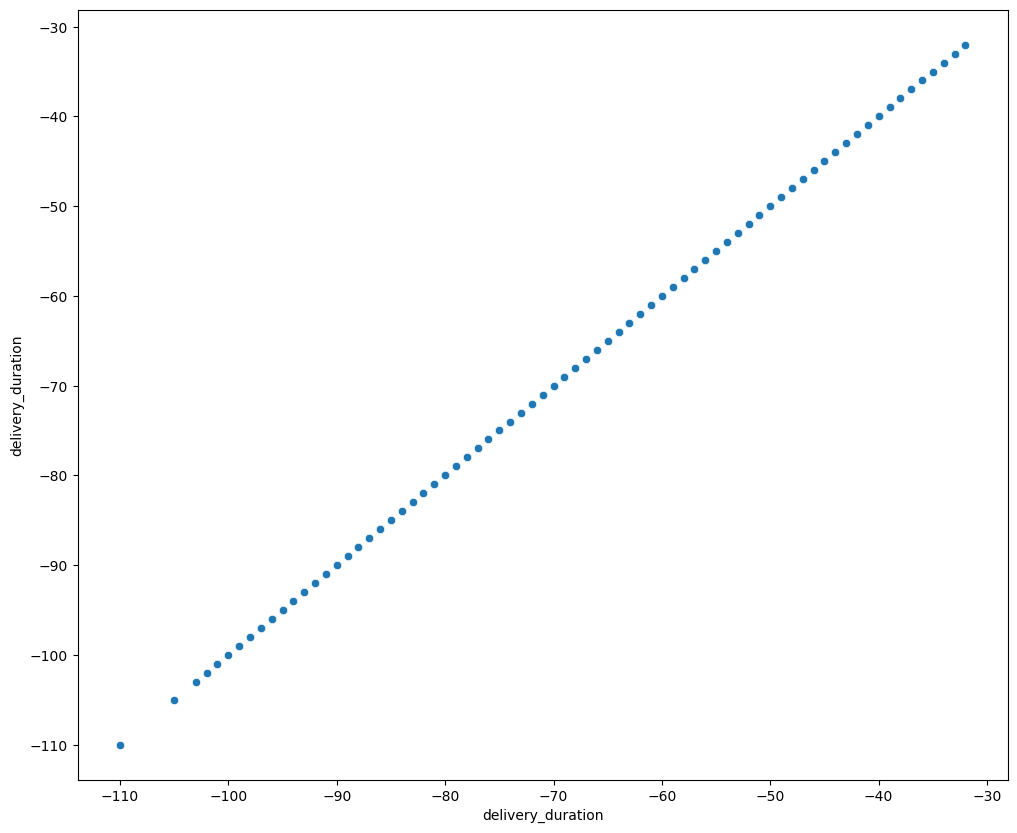

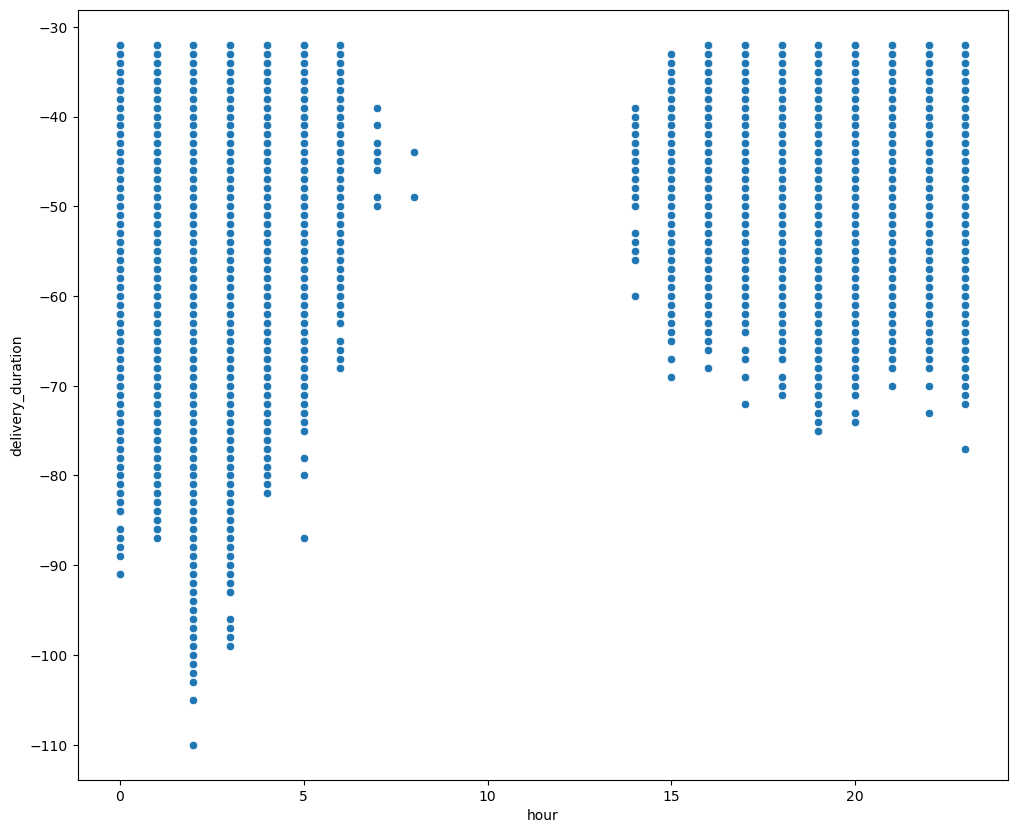

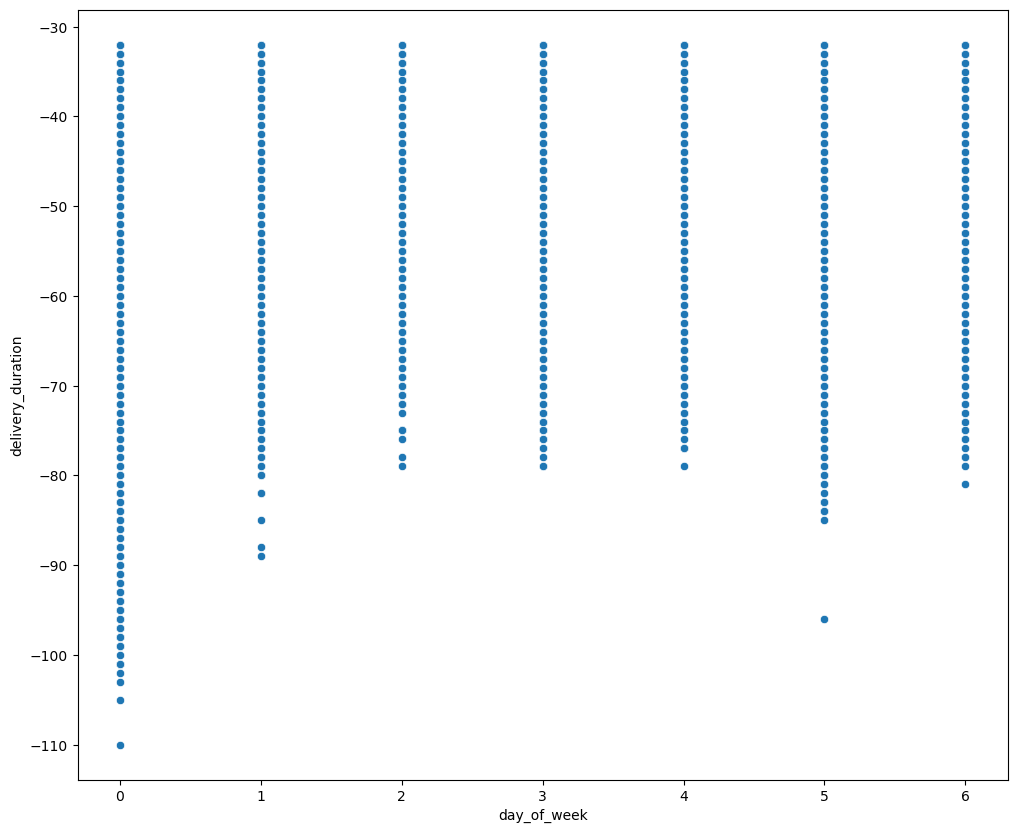

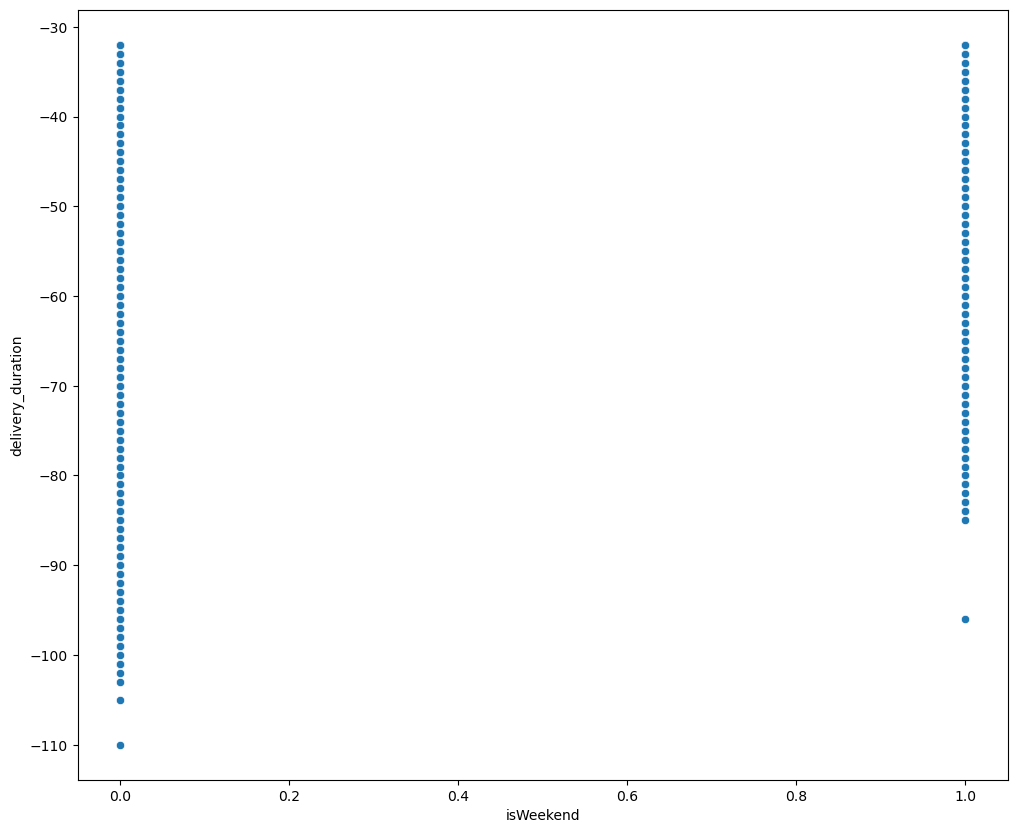

In [1112]:
# Scatter plot to visualise the relationship between time_taken and other features
for i in num_cols:
    plt.figure(figsize=(12,10))
    sns.scatterplot(x=df[i],y=df['delivery_duration'])
    plt.show()


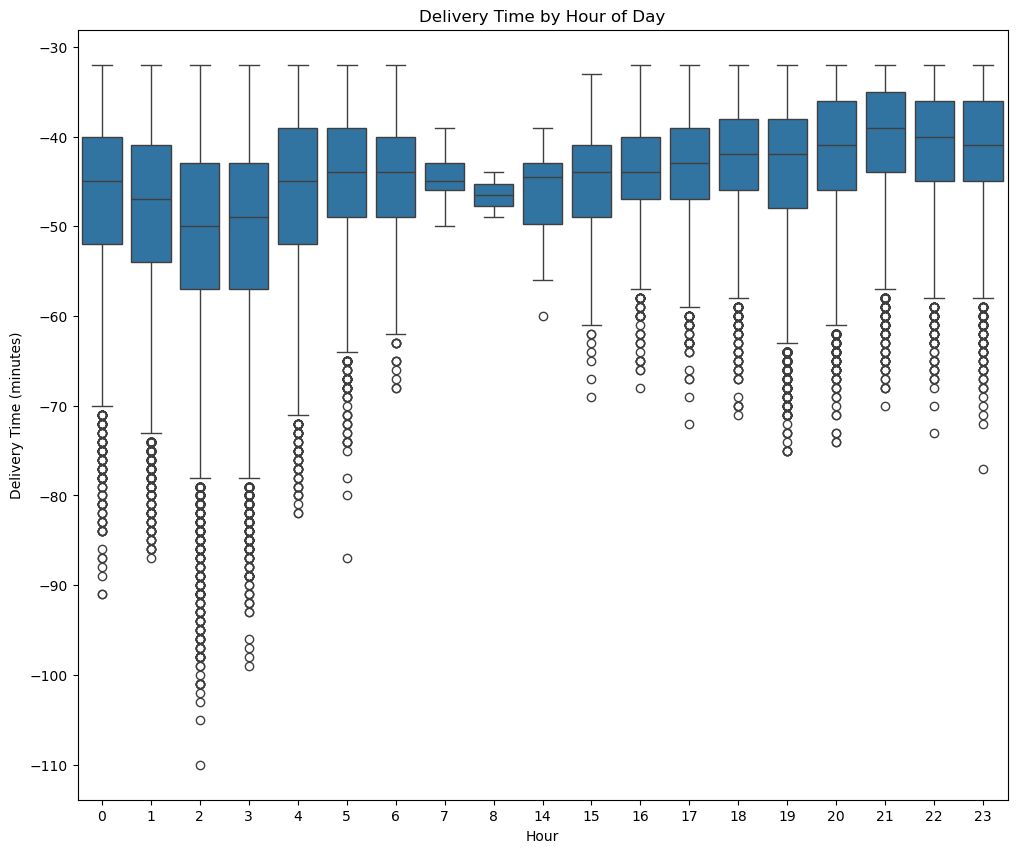

In [1113]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12,10))
sns.boxplot(x='hour', y='delivery_duration',data = df)
plt.title('Delivery Time by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Delivery Time (minutes)')
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

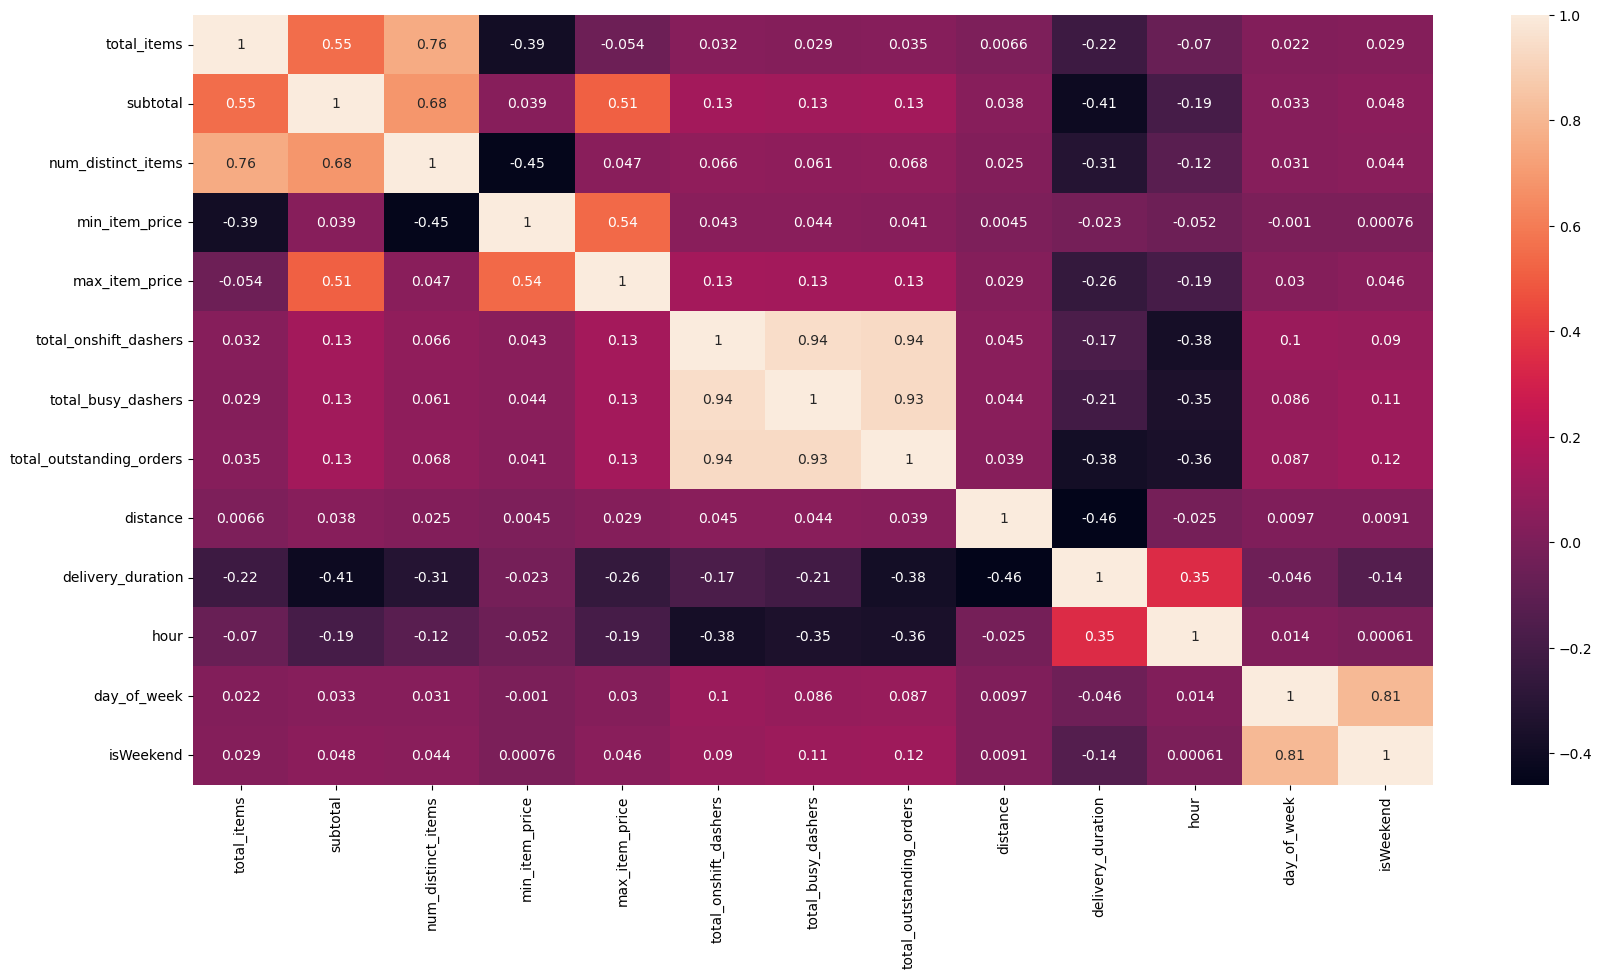

In [1116]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(20,10))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [1118]:
# Drop 3-5 weakly correlated columns from training dataset
# Step 1: Calculate correlation
correlation = df.corr()

# Step 2: Look at correlation with 'time_taken'
cor_with_target = correlation['delivery_duration'].sort_values()

print(cor_with_target)

# Choose columns with very weak correlation
weak_corr_cols = cor_with_target[(cor_with_target > -0.05) & (cor_with_target < 0.05)].index.tolist()

# You can pick the first 3-5 of these
cols_to_drop = weak_corr_cols[:5]

print(cols_to_drop)
df_train = df.drop(columns=cols_to_drop)

distance                   -0.460173
subtotal                   -0.413267
total_outstanding_orders   -0.384999
num_distinct_items         -0.312055
max_item_price             -0.255167
total_items                -0.224856
total_busy_dashers         -0.206045
total_onshift_dashers      -0.171015
isWeekend                  -0.136414
actual_delivery_time       -0.055459
created_at                 -0.054656
day_of_week                -0.045878
store_primary_category     -0.026973
min_item_price             -0.022753
market_id                   0.073016
order_protocol              0.136755
hour                        0.346366
delivery_duration           1.000000
Name: delivery_duration, dtype: float64
['day_of_week', 'store_primary_category', 'min_item_price']


In [1119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   order_protocol            175777 non-null  category      
 4   total_items               175777 non-null  int64         
 5   subtotal                  175777 non-null  int64         
 6   num_distinct_items        175777 non-null  int64         
 7   max_item_price            175777 non-null  int64         
 8   total_onshift_dashers     175777 non-null  float64       
 9   total_busy_dashers        175777 non-null  float64       
 10  total_outstanding_orders  175777 non-null  float64       
 11  distance                  175777 non-null  float64       
 12  de

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

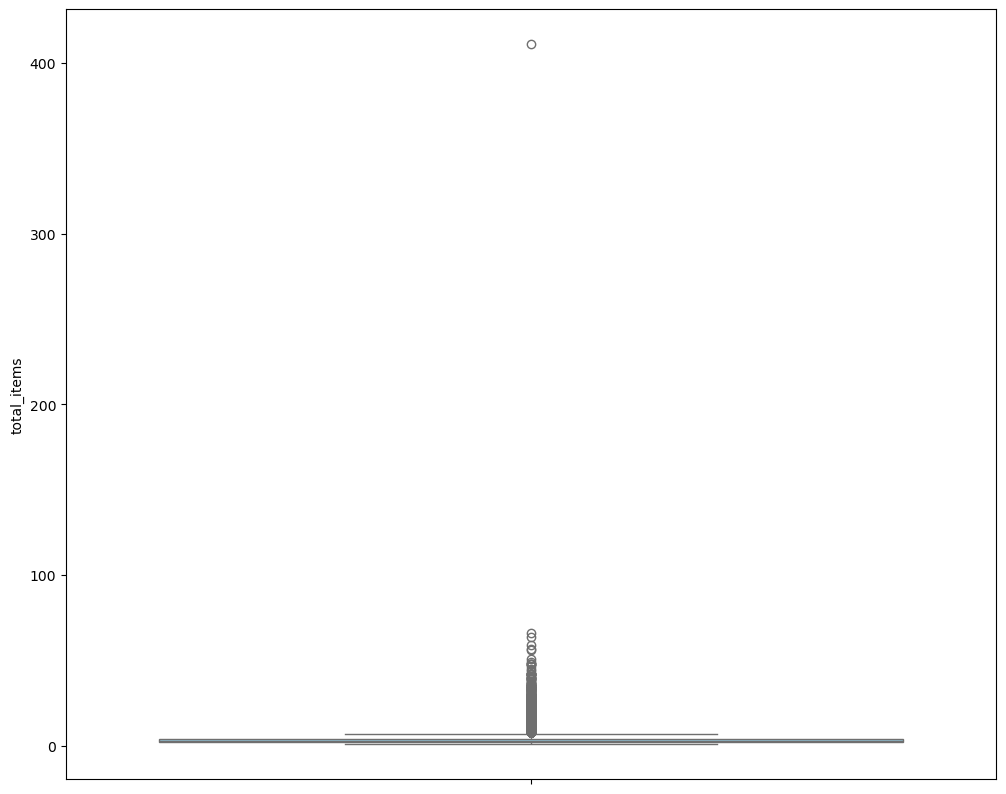

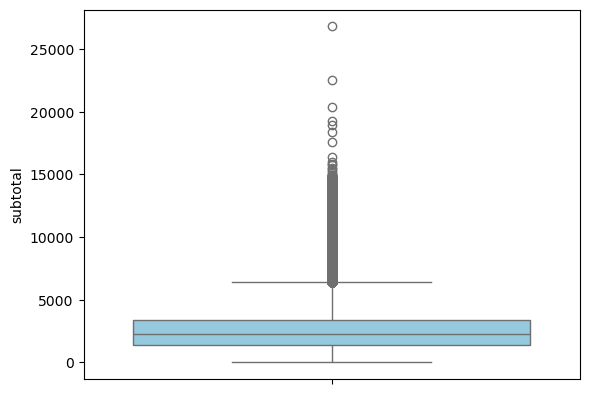

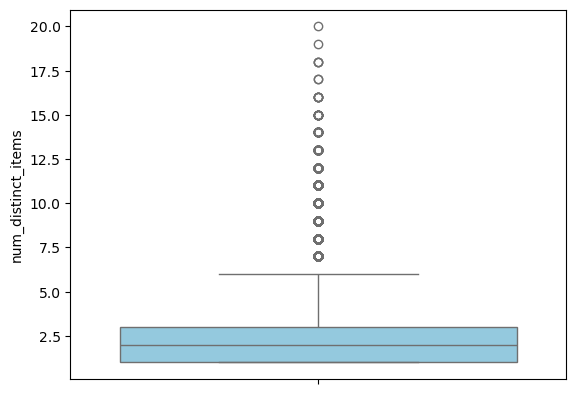

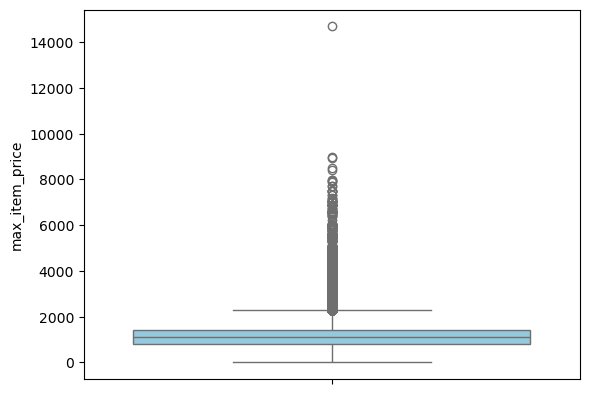

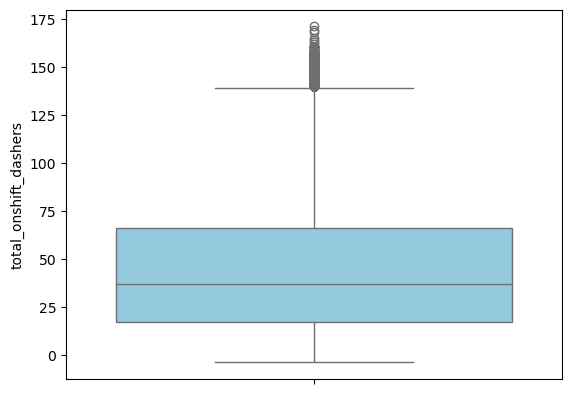

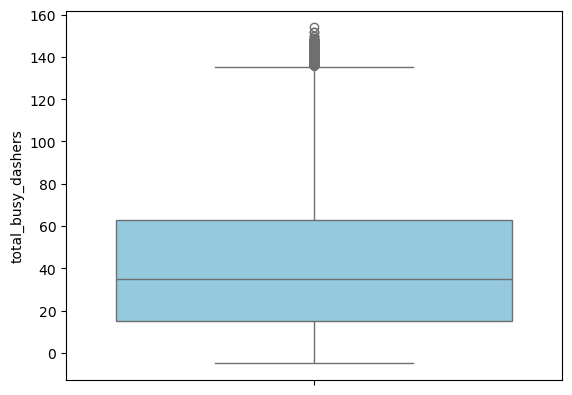

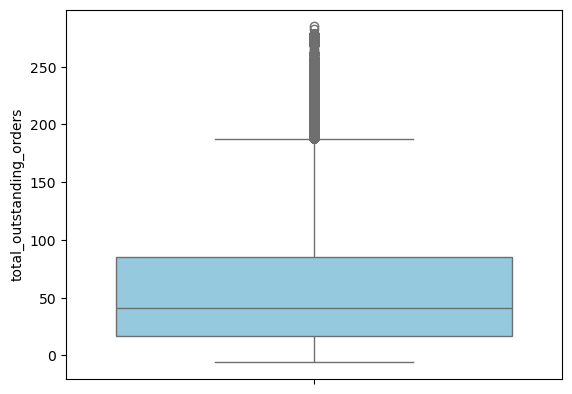

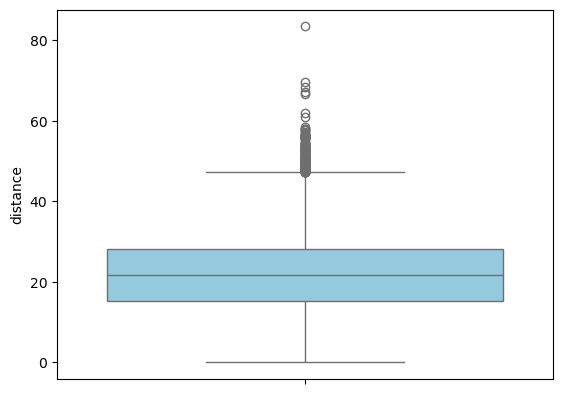

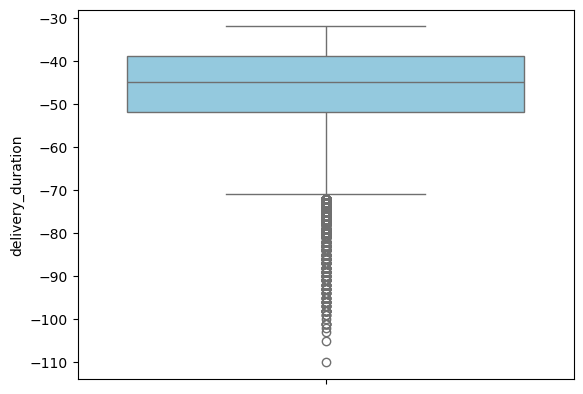

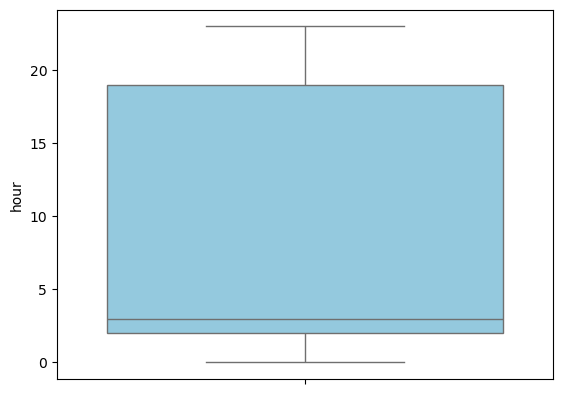

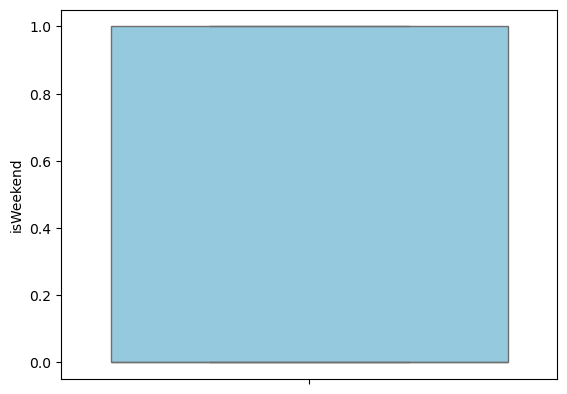

In [1122]:
# Boxplot for time_taken
num_cols =  df_train.select_dtypes(include=['int64', 'float64', 'int32']).columns
plt.figure(figsize=(12,10))
for i in num_cols:
    sns.boxplot(y=df[i], color='skyblue')
    plt.show()
    
    

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [1124]:
# Handle outliers

for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only the rows within bounds
    df_train = df_train[(df_train[col] >= lower_bound) & (df_train[col] <= upper_bound)]

In [1125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146857 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 146857 non-null  category      
 1   created_at                146857 non-null  datetime64[ns]
 2   actual_delivery_time      146857 non-null  datetime64[ns]
 3   order_protocol            146857 non-null  category      
 4   total_items               146857 non-null  int64         
 5   subtotal                  146857 non-null  int64         
 6   num_distinct_items        146857 non-null  int64         
 7   max_item_price            146857 non-null  int64         
 8   total_onshift_dashers     146857 non-null  float64       
 9   total_busy_dashers        146857 non-null  float64       
 10  total_outstanding_orders  146857 non-null  float64       
 11  distance                  146857 non-null  float64       
 12  deliver

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [1127]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [1130]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [1132]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [1134]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [1136]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [1138]:
# Drop the weakly correlated columns from training dataset



Preprocessing

In [1140]:
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

['market_id', 'order_protocol']


In [1141]:
df[cat_cols].nunique()

market_id         6
order_protocol    7
dtype: int64

In [1142]:
#create dummies for models
df1=pd.get_dummies(df_train,columns=["market_id"],drop_first=True,dtype=int)

In [1143]:
df1=pd.get_dummies(df1,columns=["order_protocol"],drop_first=True,dtype=int)

In [1144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146857 entries, 0 to 175776
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   created_at                146857 non-null  datetime64[ns]
 1   actual_delivery_time      146857 non-null  datetime64[ns]
 2   total_items               146857 non-null  int64         
 3   subtotal                  146857 non-null  int64         
 4   num_distinct_items        146857 non-null  int64         
 5   max_item_price            146857 non-null  int64         
 6   total_onshift_dashers     146857 non-null  float64       
 7   total_busy_dashers        146857 non-null  float64       
 8   total_outstanding_orders  146857 non-null  float64       
 9   distance                  146857 non-null  float64       
 10  delivery_duration         146857 non-null  float64       
 11  hour                      146857 non-null  int32         
 12  isWeeke

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [1147]:
# Import libraries
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [1149]:
# Apply scaling to the numerical columns
scaler=StandardScaler()
y= df1['delivery_duration']
X= df1.drop(columns=['actual_delivery_time', 'created_at', 'delivery_duration'])
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
X_columns = X_train.columns
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [1150]:
X_train_df=pd.DataFrame(X_train,columns=X_columns)
X_test_df=pd.DataFrame(X_test,columns=X_columns)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [1154]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression


In [1155]:
# Train the model using the training data
X_train_sm=sm.add_constant(X_train) #X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()

In [1156]:
# Make predictions
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 5.149e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:00:00   Log-Likelihood:            -2.7460e+05
No. Observations:              117485   AIC:                         5.493e+05
Df Residuals:                  117463   BIC:                         5.495e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.4849      0.007  -6085.591      0.000     -44.499     -44.471
x1             0.1132      0.018      6.197      0.000       0.077       0.149
x2            -1.5316      0.014   -105.651      0.000      -1.560      -1.503
x3            -0.6490      0.016    -40.437      0.000      -0.680      -0.618
x4            -0.1983      0.011    -17.557      0.000      -0.220      -0.176
x5            10.7087      0.025    434.115      0.000      10.660      10.757
x6             3.6120      0.023    155.124      0.000       3.566       3.658
x7           -15.1031      0.022   -671.983      0.000     -15.147     -15.059
x8            -4.1625      0.007   -566.136      0.000      -4.177      -4.148
x9             1.8136      0.008    218.843      0.000       1.797       1.830
x10           -0.6758      0.007    -91.692      0.000      -0.690      -0.661
x11            2.0668      0.011    192.364      0.000       2.046       2.088
x12            1.3183      0.009    151.928      0.000       1.301       1.335
x13            1.5383      0.011    145.451      0.000       1.518       1.559
x14            0.9952      0.009    116.403      0.000       0.978       1.012
x15            0.1476      0.007     20.034      0.000       0.133       0.162
x16            0.2134      0.008     25.458      0.000       0.197       0.230
x17            0.6194      0.009     67.947      0.000       0.602       0.637
x18            0.5242      0.008     61.939      0.000       0.508       0.541
x19            1.1457      0.009    127.197      0.000       1.128       1.163
x20            0.0834      0.007     11.307      0.000       0.069       0.098
x21            0.0168      0.007      2.303      0.021       0.003       0.031
==============================================================================
Omnibus:                    30151.105   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110845.494
Skew:                          -1.257   Prob(JB):                         0.00
Kurtosis:                       7.040   Cond. No.                         7.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1157]:
# Find results for evaluation metrics

y_train_pred=res1.predict(X_train_sm)
y_test_pred=res1.predict(X_test_sm)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,2),"Test:",round(r2_test,2))

Train: 0.9 Test: 0.9


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [1161]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE # Automated Feature Selection (Recursive Feature Elimination)
from sklearn.linear_model import LinearRegression



In [1162]:
# Build the final model with selected number of features

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=8) #8-20


In [1163]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False])

In [1164]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'market_id_2.0',
       'market_id_4.0'],
      dtype='object')


In [1165]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

In [1166]:
print(X_train.shape)
print(X_test.shape)

(117485, 8)
(29372, 8)


In [1167]:
X_train_sm=sm.add_constant(X_train) #X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [1168]:
model2=sm.OLS(np.array(y_train),X_train_sm) # Ordinary Least Squares
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 8.765e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:00:01   Log-Likelihood:            -2.9701e+05
No. Observations:              117485   AIC:                         5.940e+05
Df Residuals:                  117476   BIC:                         5.941e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -44.4849      0.009  -5029.092      0.000     -44.502     -44.468
subtotal                    -2.1087      0.009   -231.621      0.000      -2.127      -2.091
total_onshift_dashers       11.1449      0.030    375.227      0.000      11.087      11.203
total_busy_dashers           3.3862      0.028    120.822      0.000       3.331       3.441
total_outstanding_orders   -15.3242      0.027   -564.093      0.000     -15.377     -15.271
distance                    -4.1335      0.009   -465.569      0.000      -4.151      -4.116
hour                         1.8008      0.010    180.673      0.000       1.781       1.820
market_id_2.0                1.3939      0.011    122.992      0.000       1.372       1.416
market_id_4.0                0.9175      0.011     81.916      0.000       0.896       0.939
==============================================================================
Omnibus:                    18308.813   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40124.587
Skew:                          -0.924   Prob(JB):                         0.00
Kurtosis:                       5.187   Cond. No.                         7.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature        VIF
0                     const   1.000000
1                  subtotal   1.059319
2     total_onshift_dashers  11.275051
3        total_busy_dashers  10.038711
4  total_outstanding_orders   9.432132
5                  distance   1.007441
6                      hour   1.269692
7             market_id_2.0   1.641532
8             market_id_4.0   1.603222

In [1170]:
X_train_sm=X_train_sm.drop("total_onshift_dashers",axis=1)
X_test_sm=X_test_sm.drop("total_onshift_dashers",axis=1)

In [1171]:
model3=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                 3.642e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:00:02   Log-Likelihood:            -3.4329e+05
No. Observations:              117485   AIC:                         6.866e+05
Df Residuals:                  117477   BIC:                         6.867e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -44.4849      0.013  -3391.782      0.000     -44.511     -44.459
subtotal                    -2.0612      0.013   -152.709      0.000      -2.088      -2.035
total_busy_dashers           8.7708      0.036    245.719      0.000       8.701       8.841
total_outstanding_orders   -10.3467      0.035   -294.348      0.000     -10.416     -10.278
distance                    -4.0786      0.013   -309.868      0.000      -4.104      -4.053
hour                         1.3214      0.015     90.157      0.000       1.293       1.350
market_id_2.0                1.9619      0.017    117.806      0.000       1.929       1.995
market_id_4.0                1.2733      0.017     76.948      0.000       1.241       1.306
==============================================================================
Omnibus:                     1884.605   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3017.901
Skew:                          -0.157   Prob(JB):                         0.00
Kurtosis:                       3.720   Cond. No.                         5.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                     const  1.000000
1                  subtotal  1.059114
2        total_busy_dashers  7.406781
3  total_outstanding_orders  7.183122
4                  distance  1.007168
5                      hour  1.248830
6             market_id_2.0  1.612248
7             market_id_4.0  1.591731

In [1173]:
X_train_sm=X_train_sm.drop("total_busy_dashers",axis=1)
X_test_sm=X_test_sm.drop("total_busy_dashers",axis=1)

In [1174]:
model4=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 2.142e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:00:02   Log-Likelihood:            -3.6765e+05
No. Observations:              117485   AIC:                         7.353e+05
Df Residuals:                  117478   BIC:                         7.354e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -44.4849      0.016  -2756.599      0.000     -44.517     -44.453
subtotal                    -2.0068      0.017   -120.850      0.000      -2.039      -1.974
total_outstanding_orders    -2.7777      0.021   -133.314      0.000      -2.819      -2.737
distance                    -4.0261      0.016   -248.627      0.000      -4.058      -3.994
hour                         1.0779      0.018     59.908      0.000       1.043       1.113
market_id_2.0                2.8437      0.020    142.121      0.000       2.805       2.883
market_id_4.0                1.9714      0.020     98.286      0.000       1.932       2.011
==============================================================================
Omnibus:                     1192.559   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1258.908
Skew:                          -0.230   Prob(JB):                    4.28e-274
Kurtosis:                       3.214   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                     const  1.000000
1                  subtotal  1.058829
2  total_outstanding_orders  1.667042
3                  distance  1.006902
4                      hour  1.243121
5             market_id_2.0  1.537370
6             market_id_4.0  1.544805

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [1178]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_pred=res4.predict(X_train_sm)
y_test_pred=res4.predict(X_test_sm)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,2),"Test:",round(r2_test,2))

Train: 0.52 Test: 0.52


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [1182]:
#Compare the scaled vs unscaled features used in the final model

#All features have been scaled in the final model to ensure that no feature with larger numerical values receives unnecessary weight or dominance over others

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [1184]:
# Analyze the effect of a unit change in a feature, say 'total_items'

#total_items is not used in the final model due to VFI > 5 so i dropped this and kept the other features so for this question i can explain with the oother one
#like distance for every increase in 4 units there is a delay in delivery duration .


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>yes there are 3 catagorical variables in data
>'market_id', 'store_primary_category', 'order_protocol'
> MARKET ID 2 has the highest orders
>store_primary_category 4 has highest orders
>order protocol 2 has the highest orders



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

it means training data percentage is 80 % and test data percentage is 20 % from the overall data . 

---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>


Hour is the feature which extracted from 'created_at' variable and this has the highest corrleaton with the target variable

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

To deduct outliers usually we use boxplot and IQR method to get the lower bound and upper bounds. Once we found the upper bound and lower bound keep the data within this limit and drop the data apart from this both the bounds. 

---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>
Based on the t-statistics and the coefficients, distance and hour seem to have the most significant impact on the target variable.




---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear Regression is one of the simplest and most widely used algorithms in machine learning and statistics.
It models the relationship between one or more independent variables (features, 
𝑋
X) and a dependent variable (target, 
𝑦
y) by fitting a linear equation (straight line or hyperplane) to observed data.

If there is one independent variable, it’s called Simple Linear Regression.

If there are multiple independent variables, it’s called Multiple Linear Regression.

The goal is to find the best-fitting straight line (or hyperplane) that minimizes the difference between the predicted values and actual values.






---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>


Simple Linear Regression models the relationship between one independent variable (feature) and one dependent variable (target).

The goal is to fit a straight line through the data points that best predicts the target variable.
Multiple Linear Regression models the relationship between two or more independent variables (features) and one dependent variable (target).

It fits a hyperplane (instead of a line) in multi-dimensional space.

---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
In Linear Regression, the cost function measures how far off the model's predictions are from the actual values.
Its main role is:

To quantify the error between predicted values (
𝑦
^
y
^
​
 ) and actual values (
𝑦
y).

To guide the model in finding the best set of coefficients (
𝛽
β) that minimizes prediction error.

Smaller cost = better model.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
Overfitting happens when a model learns the training data too well — including noise, outliers, and random fluctuations — instead of capturing the true underlying pattern.

The model is too complex (too many parameters or too flexible).

It performs very well on training data but poorly on new, unseen data 

Underfitting happens when a model fails to learn enough from the training data.

The model is too simple (not enough flexibility or capacity).

It performs poorly on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>
A residual is the difference between the actual value and the predicted value:

A residual plot is a graph where:

The x-axis shows the predicted values (or sometimes the independent variable),

The y-axis shows the residuals.

It helps visualize how well the model fits the data.